## Problem Statement - Identification of factors for varying car price and help Chinese company to enter US market.

## Steps to follow
- Data Loading and preliminary understanding the data
- Data Correction
- Understand the data and perform EDA on the data
- Split the data into train and test set for Linear regression
- Build Model and Perform train set validation
- Use different combination of Independent variable to perform validation of train results
    - Correlation analysis
    - Check P-values for different combination
    - Evaluation of R Square, Adjusted R Square and VIF 
- Indentification of Key Factors based on R2, Adjusted R2 and VIF
- Predict on Test set
- Compare Train and Test R2-Square value

In [1]:
# ALL IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_colwidth', 200)

import warnings
warnings.filterwarnings('ignore')

### Utility Functions

In [2]:
'''
For Displaying Value on top of the bar plots
'''
def val_on_bar(axs,frmt=' '):
    def _single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height()) + frmt
            ax.text(_x, _y, value , ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single_plot(ax)
    else:
        _single_plot(axs)

'''
Function For Lable Encoding Not used
'''
from sklearn.preprocessing import LabelEncoder

def performEncoding(encodingType,df):
    
    if encodingType=='LE':
        le = LabelEncoder() 
        tmp = df
        #Use Label Encoder for These columns as having many categorical variables and having huge class imbalance
        # We can scale them using min max scalar to have the values between 0 and 1
        # Later by using RFE we can remove the features which are not havint statistical significance
        #'enginelocation' - rop from analysis
        le_cols = []
        for col in le_cols:
            le.fit(df[col].drop_duplicates()) 
            df[col] = le.transform(tmp[col])
    
    return df

# Step 1 : Loading and Understanding of the data
- Load the data - Car data and data dictionary for car price
- Correct the data corresponding to data dictionary xls - Lot many null columns, unwanted columns as unnamed etc
- Create a dataframe containing the column Name, data type and column desription mapped to a single record od car data
- Derived Matrix for Car Company Name
    - Correct Car Company Name
- Explore the car data based on various Plots
- Check the data using Pairplot, Heatmap

In [3]:
#Load Car Price Data

car = pd.read_csv("CarPrice_Assignment.csv")

# Load the data dictionary

data_dict = pd.read_excel("Data Dictionary - carprices.xlsx")

#Correction of Data Dictionary Dataframe

data_dict.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5',
                'Unnamed: 6','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 12','Unnamed: 13'],axis=1,inplace=True)
data_dict.dropna(axis=0,inplace=True)
data_dict[['Col_Name','Decription']] = data_dict
data_dict.drop(['Unnamed: 7','Unnamed: 11'],axis=1,inplace=True)
data_dict.reset_index(inplace=True)
data_dict.drop('index',axis=1,inplace=True)

'''
Create the Dataframe for dtypes
'''
d_typ = pd.DataFrame(car.dtypes,columns=['dtypes'])
#Reset the Index
d_typ = d_typ.reset_index()
#Rename the Index column as Column_name
d_typ['column_name'] = d_typ['index']
d_typ = d_typ[['column_name','dtypes']]

'''
Create A New Column with First Value/Any one value from the Main Dataframe Lending_loan
'''
d_typ['Column value'] = car.loc[0].values

'''
Concat With Data_Dictionary to have a view of the data mapped with Column Name and Description
'''

data_view = pd.concat([d_typ,data_dict],axis=1)
data_view

,column_name,dtypes,Column value,Col_Name,Decription
0,car_ID,int64,1,Car_ID,Unique id of each observation (Interger)
1,symboling,int64,3,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,CarName,object,alfa-romero giulia,carCompany,Name of car company (Categorical)
3,fueltype,object,gas,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,object,std,aspiration,Aspiration used in a car (Categorical)
5,doornumber,object,two,doornumber,Number of doors in a car (Categorical)
6,carbody,object,convertible,carbody,body of car (Categorical)
7,drivewheel,object,rwd,drivewheel,type of drive wheel (Categorical)
8,enginelocation,object,front,enginelocation,Location of car engine (Categorical)
9,wheelbase,float64,88.6,wheelbase,Weelbase of car (Numeric)


## Step 2: Data Correction and Preparation
### A-  Check For Null and NA values in the Dataset

In [4]:
nadata = False
# Check for Null Data in the Car data
if len(car.columns[car.isna().any()]) ==0:
    print('There is no null data in the Car dataset')
else:
    print('Deal with Null Data')
    nadata =True
    
if len(car.columns[car.isnull().any()])== 0:
    print('There is no NA data in the Car dataset')
else:
    print('Deal with NA Data')
    
if nadata:
    missing_data = car.isnull().sum()
    missing_data.sort_values(inplace=True, ascending=False)
    print(missing_data)

There is no null data in the Car dataset
There is no NA data in the Car dataset


### B-  Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 


As per problem statement, We need to consider only company name as the independent variable for model building.

In the dataset, for few of the records the car company name is not correct or short code is used. Correct the car company name to have it nice categorised.

In [5]:
'''
1 - Get Car Company Name
'''

car['companyName']= car.CarName.apply(lambda x: x.split()[0])
car['companyName'].unique()

'''
2 - Correct Company Name
'''
#Correct Incorrect Car Compnay Names 
    # - toyouta : toyota, vokswagen: volkswagen, vw: volkswagen, maxda : mazda, nissan: Nissan, porcshce: porsche

company_mapping = {"companyName":{ "maxda": 'mazda','porcshce':'porsche', "toyouta": 'toyota',
                                  "vokswagen": 'volkswagen',"vw": 'volkswagen','Nissan':'nissan'}}
car = car.replace(company_mapping)

'''
3 - Drop Car Name Column and Car_id
'''
car.drop(['CarName','car_ID'],axis=1,inplace=True)


#'''
#4 - Convert Symboling to object type datatype
#'''
#Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, 
# -3 that it is probably pretty safe.(Categorical)

# car['symboling'] = car['symboling'].astype(object, copy=True)

### There are duplicate row records with different price

In [6]:
except_price = list(car.columns)
except_price.remove('price')
car_X = car[except_price]
car = car[~car_X.duplicated()] ## Duplicate Features but different amount
#Display the dataframe duplicate records 
car_X[car_X.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,companyName
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.680,9.0,111,5000,21,27,alfa-romero
26,1,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.230,9.4,68,5500,31,38,dodge
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,258,mpfi,3.63,4.170,8.1,176,4750,15,19,jaguar
56,3,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,mazda
61,1,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,mazda
62,0,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,mazda
116,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.520,21.0,95,4150,28,33,peugeot
127,3,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.900,9.5,207,5900,17,25,porsche


Finding :
    - Excluding the Car Model Name and creating Company name column, if we exclude the dependent column 'Price' then there have few duplicate records(identical columns). So remove the duplicate records.

### Outlier Detection based on 3-Sigma Rule
- When checked the dataset, identifed outliners with respect to Horsepower, peakrpm and price by applying 3-sigma rule.
- As we are having very minimum data and these may be actual data, with some exceptional Hosepower and Peakrmp configuration or Price may be high due to some other properties, we can not exclude them from analysis.

In [7]:
#Checking for outlier based on horsepower
car[car['horsepower'] > 1000].count()

#Checking for outlier data based on horsepower
car[np.abs(car.horsepower-car.horsepower.mean())>=(3*car.horsepower.std())]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyName
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
129,1,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,...,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,porsche


In [8]:
#Checking for outlier data based on horsepower
car[np.abs(car.peakrpm-car.peakrpm.mean())>=(3*car.peakrpm.std())]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyName
165,1,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,...,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0,toyota
166,1,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,...,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0,toyota


In [9]:
#Checking for outlier data based on price
car[np.abs(car.price-car.price.mean())>=(3*car.price.std())]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyName
16,0,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick
74,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick
128,3,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,...,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0,porsche


Finding:
    - As we will be using MIN_MAX_SCALER, we don't have to treat the Outliers. After min max scaler all the values will be within the range 0 and 1. Hence DO NOT DROP THEM.

## Step 3 - Exploratory Data Analysis

### A - Check the Categorical data - Count of each category and their percentages

Huge class imbalance between categories held within a single features such as: 
    - symboling(-2) has only 1.4% of data
    - carbody - hardtop  - 3.9%,convertible 2.9%
    - drivewheel- 4wd    - 4.3%
    - rear enginelocation - 1.4%
    - engine type rotor - 1.9%, dohcv- .4%
    - cylindernumber - eight, two, twelve, three are having less than 5% of data in each category
    - fuelsystem - spdi, 4bbl, mfi, spfi are having less than 5% of data in each category
    - companyName  - dodge, bmw, buick, plymouth, audi, saab, porsche, isuzu, jaguar, alfa-romero, chevrolet, renault, mercury are having less than 5% of data in each category

- So, let's first perform EDA on the data then later we will encode the categorical features for Model Building.
- We will deal with all the categorical features differently depending on there distributions

In [11]:
'''
Check the Categorical data - Count of each category and their percentages
'''
cat_car = car.select_dtypes(include=['object'])
for col in cat_car.columns:
    print(col,':')
    print(pd.concat([cat_car[col].value_counts(),cat_car[col].value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))
    print('----------------------------------------------\n')
    

fueltype :
        fueltype  fueltype
gas          178     90.36
diesel        19      9.64
----------------------------------------------

aspiration :
       aspiration  aspiration
std           161       81.73
turbo          36       18.27
----------------------------------------------

doornumber :
      doornumber  doornumber
four         111       56.35
two           86       43.65
----------------------------------------------

carbody :
             carbody  carbody
sedan             92    46.70
hatchback         68    34.52
wagon             25    12.69
hardtop            7     3.55
convertible        5     2.54
----------------------------------------------

drivewheel :
     drivewheel  drivewheel
fwd         117       59.39
rwd          71       36.04
4wd           9        4.57
----------------------------------------------

enginelocation :
       enginelocation  enginelocation
front             195           98.98
rear                2            1.02
-------------------

### Univariate Analysis
- Number of vehicles by company name
- Car Insurance Risk Factor - symboling
- Aspiration and Fueltype - pie chart
- No of doors, Drive wheel and carbody type bar plots 

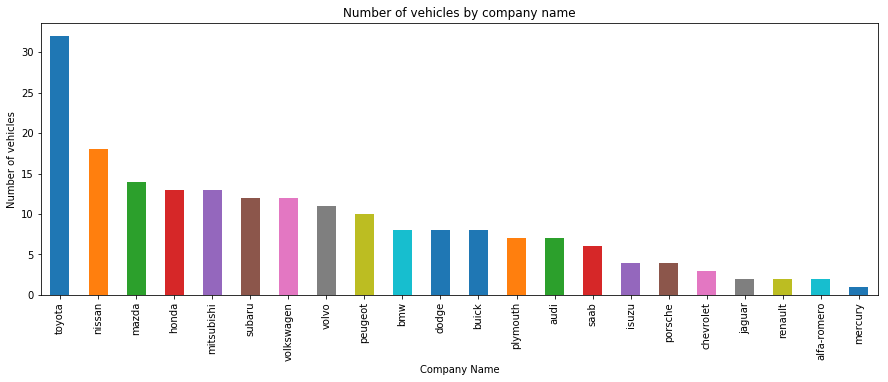

In [12]:
car['companyName'].value_counts().nlargest(car['companyName'].count()).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by company name")
plt.ylabel('Number of vehicles')
plt.xlabel('Company Name');

Findings: 
    - The number of cars under each car company is not sampled uniformly. There is huge class imbalance.

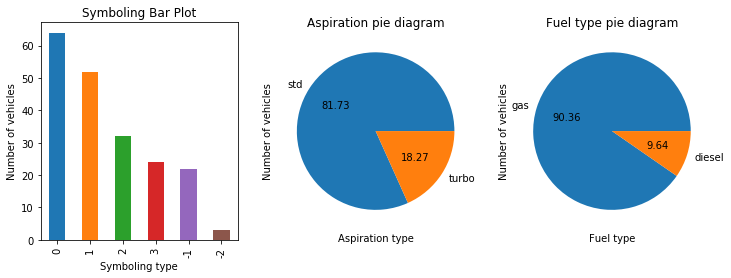

In [13]:
plt.subplot(1,3,1)
car.symboling.value_counts().plot(kind='bar',figsize=(12, 4))
plt.title("Symboling Bar Plot")
plt.ylabel('Number of vehicles')
plt.xlabel('Symboling type');

plt.subplot(1,3,2)
car['aspiration'].value_counts().plot.pie(figsize=(12, 4), autopct='%.2f')
plt.title("Aspiration pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Aspiration type');

plt.subplot(1,3,3)
car['fueltype'].value_counts().plot.pie(figsize=(12, 4), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

Findings: 
    - The number of cars under each risk factor is not sampled uniformly. There is huge class imbalance.
    - Aspiration type 'std' is having 81.73% of the data where as 'turbo' is 18.27
    - Fuel Type gas- 90.36 where as diesel-9.64
    - We will deal with the categorical variable after performing the analysis on theirdistribution.

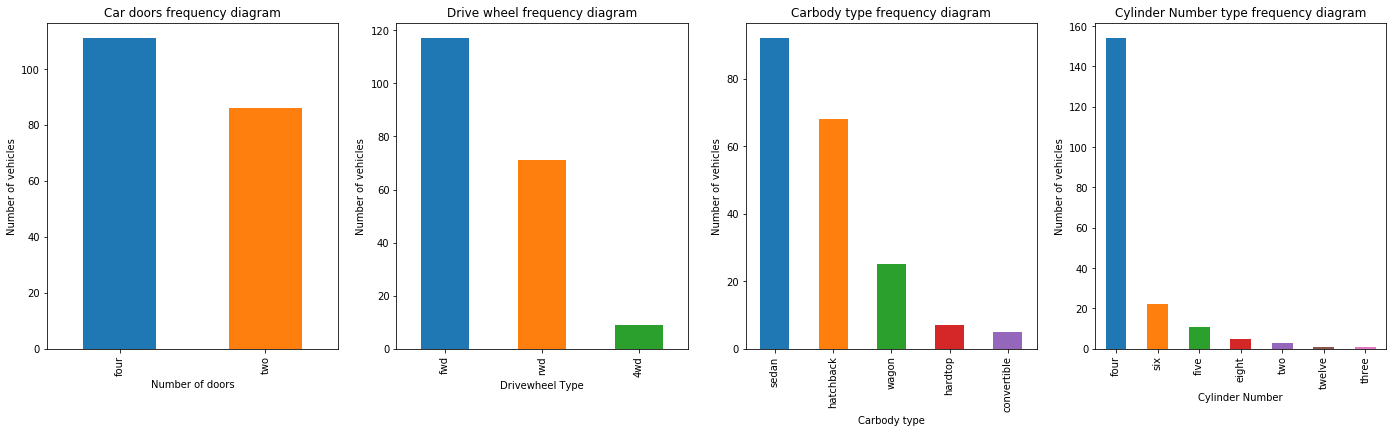

In [14]:
plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
car['doornumber'].value_counts().plot(kind='bar')
plt.title("Car doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

plt.subplot(1,4,2)
car['drivewheel'].value_counts().plot(kind='bar')
plt.title("Drive wheel frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drivewheel Type');

plt.subplot(1,4,3)
car['carbody'].value_counts().plot(kind='bar')
plt.title("Carbody type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Carbody type');

plt.subplot(1,4,4)
car['cylindernumber'].value_counts().plot(kind='bar')
plt.title("Cylinder Number type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Cylinder Number');

Finding:
    - Drivewheel, carbody and cylinder do not have even distribution. We need to perform appropriate encoding to use them in model building.
    - Fore Wheeldrive and Rear Wheel Drive are more than fur wheel drive
    - Sedan and Hatchback are more than other categories
    - Four cylindercars are more than other categories

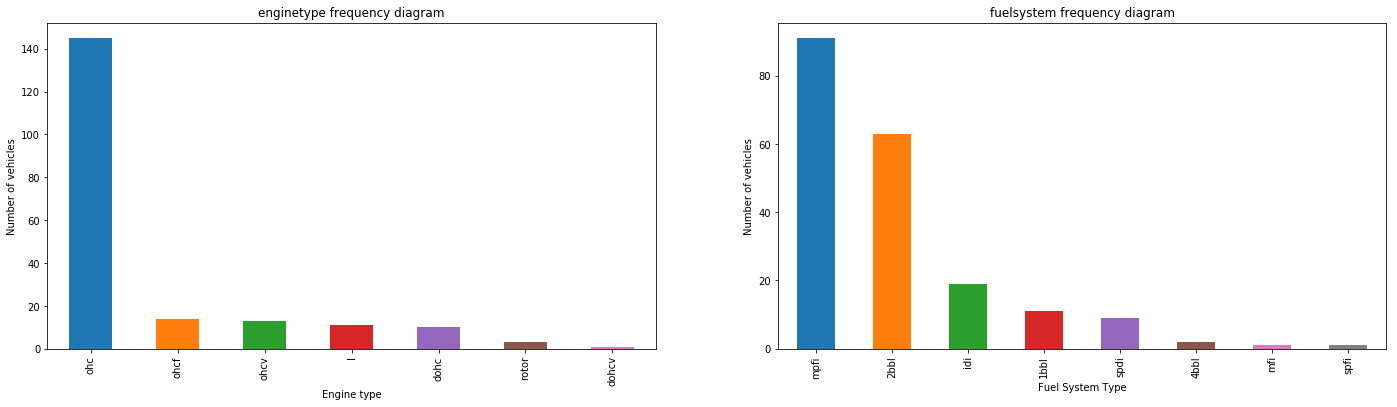

In [15]:
plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
car['enginetype'].value_counts().plot(kind='bar')
plt.title("enginetype frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Engine type');

plt.subplot(1,2,2)
car['fuelsystem'].value_counts().plot(kind='bar')
plt.title("fuelsystem frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel System Type');

Findings:
    - Car doors can be converted to numerical 4 for 'four' and 2 for 'two'
    - Drivewheel, carbody type, engine type and fuel system type are having quite less nos of data for few categories. This is also an example case of undersampling.
    - cylinder number can be converted to numerical values i.e four -4, six -6 etc.

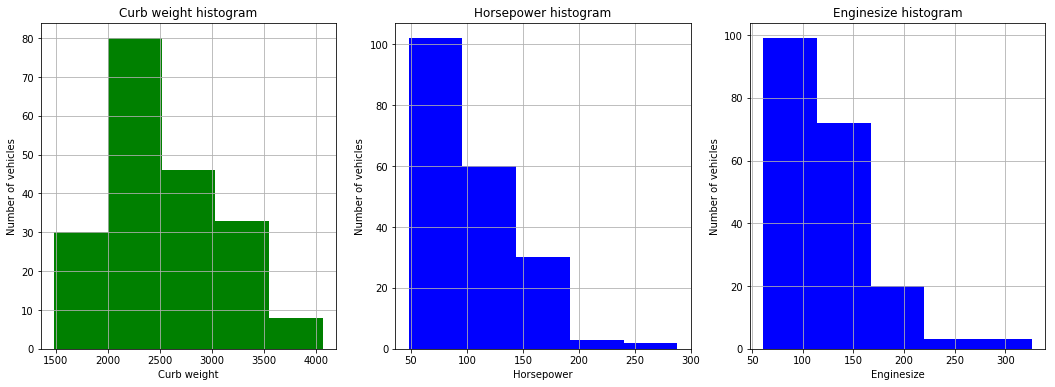

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
car['curbweight'].hist(bins=5,color='green');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

plt.subplot(1,3,2)
car['horsepower'].hist(bins=5,color='blue');
plt.title("Horsepower histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horsepower');

plt.subplot(1,3,3)
car['enginesize'].hist(bins=5,color='blue');
plt.title("Enginesize histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Enginesize');

Findings:
    - There are quite less number of cars in higher curbweight, horsepower and enginesize

### Bivariate and Correlation Analysis
- Box Plots - Car distribution based on various categorical features
- Grouping of features and checking the mean price

##### Price distribution based on Categorical Features - using box plots
 - Analysis Summary : 
     - Fuel Type: Diesel cars are on an average higher price than Gas Cars - But High Price Car are of type Gas. Class imbalance problem.
     - Turbo aspiration cars are on an average higher price than std Cars - But most of the high price car are of type std. Class imbalance problem. We need more data to know the actual affect.
     - Carbody - hardtop cars are on an average higher price than others - But Less Cars of type Hardtop - Class imbalance problem. We need more data to know the actual affect.
     - Drivewheel of type 'rwd' affects the increase in Price type -  it seems rear-wheel drive vehicles are, on an average, the most expensive, while 4-wheel and front-wheel are approximately low priced cars.

##### Function to plot box plot and print the number of observation on box plots

In [17]:
def numberonboxplot(df,col,ax):
    tops = df.groupby([col])['price'].median().sort_values(ascending=True)
    nobs = pd.DataFrame(pd.concat([df.groupby([col])['price'].median().sort_values(ascending=True),
                 df[col].value_counts()],axis=1))
    nobs.sort_values(by='price',ascending=True,inplace=True)
    nobs= nobs[col].values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    # Add it to the plot
    #print(nobs)
    pos = range(len(nobs))
    
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], tops[tick] + 0.03, nobs[tick],
                horizontalalignment='center', size='medium', color='black', weight='semibold')
        
def plotBoxPlot(col):   
    # Plot a Horizontal Line at mean price of complete dataset
    plt.axhline(y=car['price'].mean(), color='r')

    # Order the box plots in acending order of median value
    dfm = pd.DataFrame(car[[col,'price']].groupby([col]).median().sort_values(by='price',ascending=True))
    l =list(dfm.index.get_values())
    ax = sns.boxplot(x=col, y='price', data=car, palette="Set1",order=l)
    # Add jitter with the swarmplot function.
    sns.swarmplot(x=col , y='price', data=car, color="blue",order=l)

    if col!='symboling':
        numberonboxplot(car,col,ax)

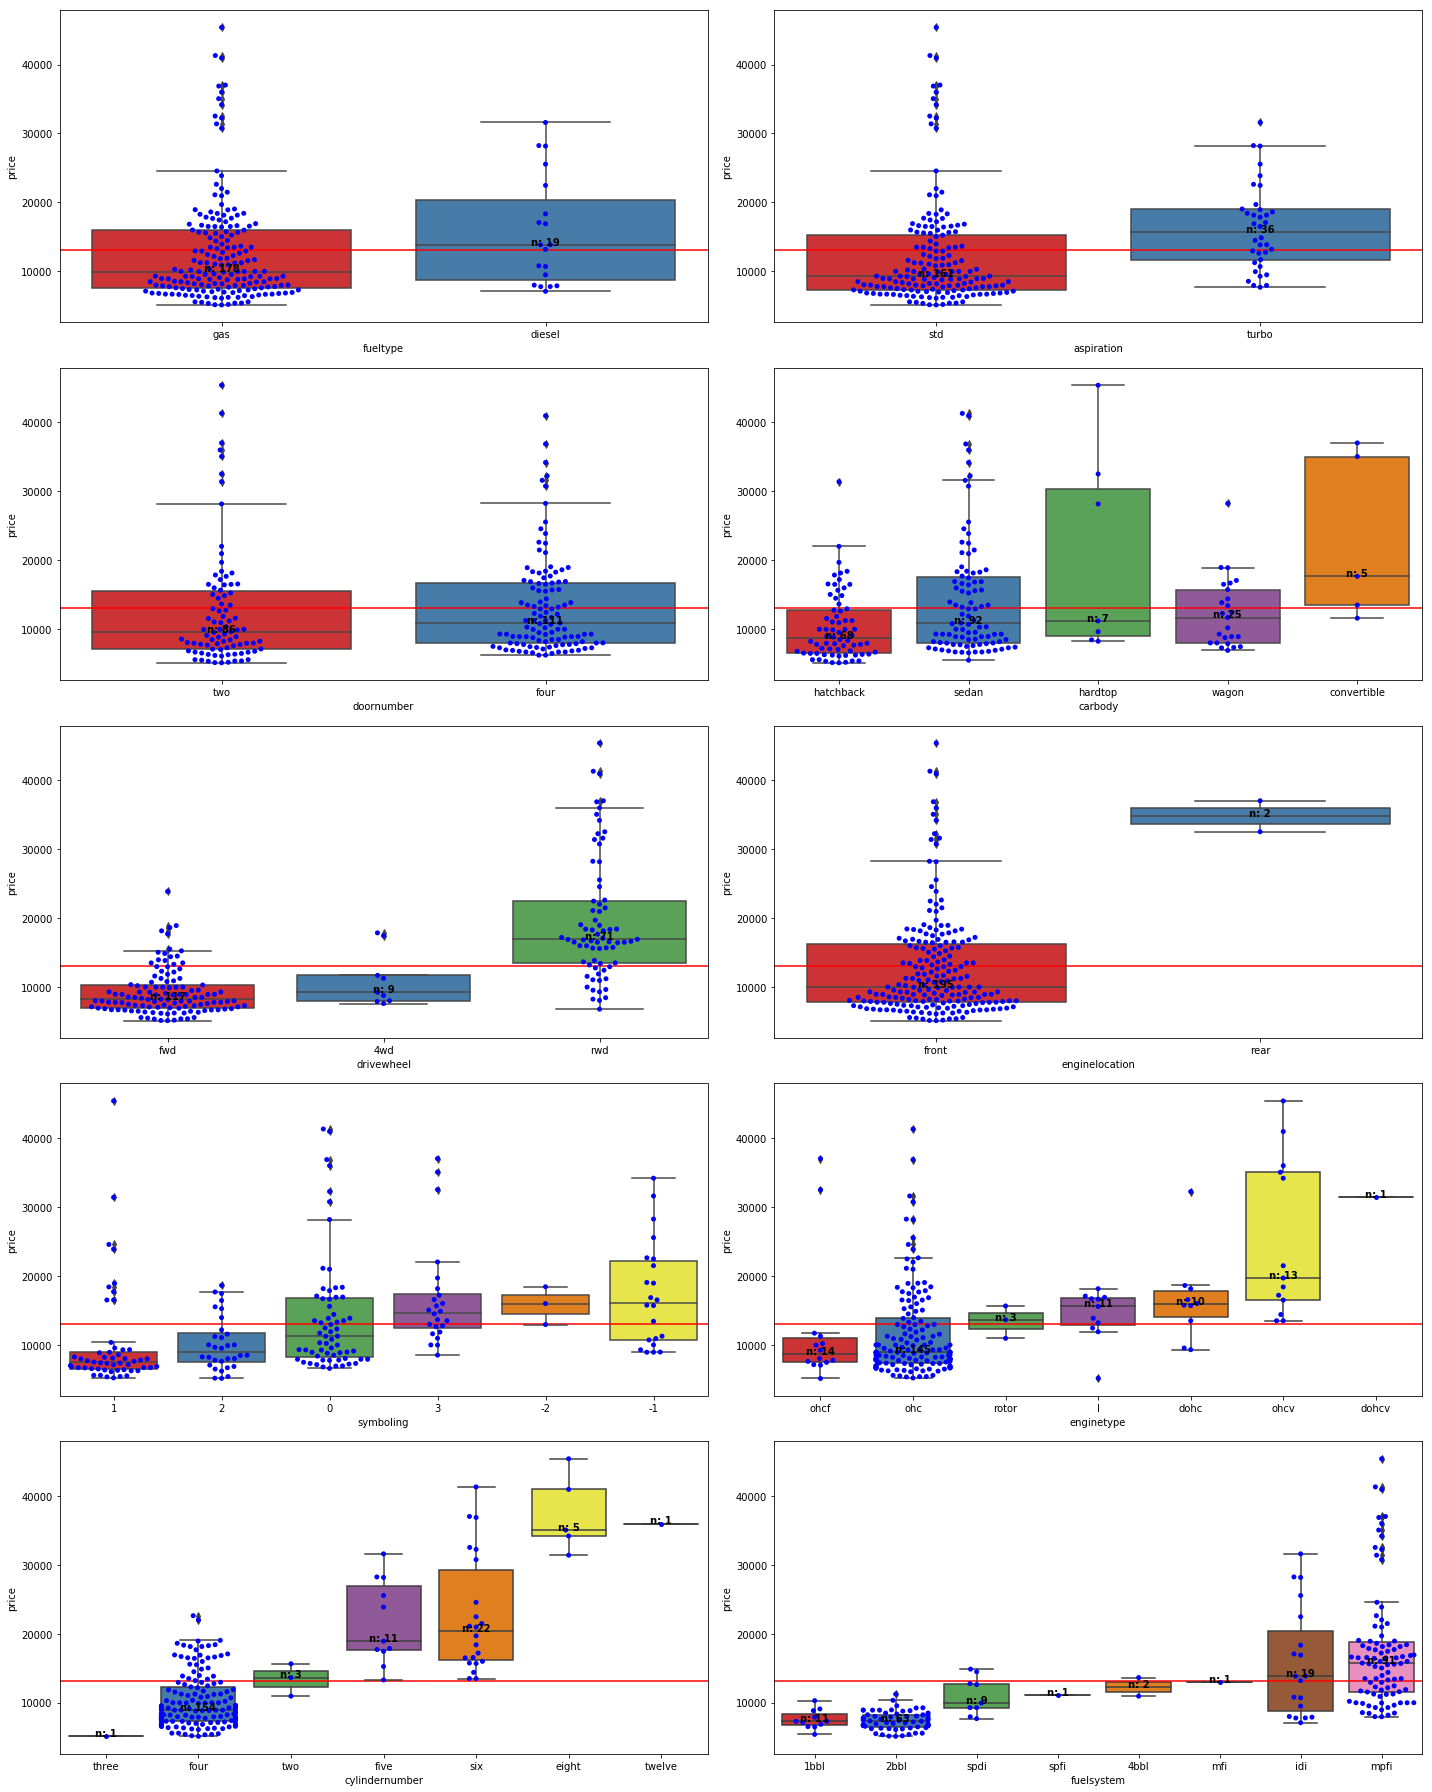

In [18]:
cat_feature = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','symboling',
               'enginetype','cylindernumber','fuelsystem']
plt.figure(figsize=(20,25))
for i, feature in enumerate(cat_feature):
    if(len(cat_feature)%2 ==0):
        rows = int(len(cat_feature)/2)
    else:
        rows = int(len(cat_feature)/2) +1
    
    plt.subplot(rows, 2, i+1)
    # Draw a horizontal Line - mean amount of price
    plt.axhline(y=car['price'].mean(), color='r')
    
    # Order the box plots in acending order of median value
    dfm = pd.DataFrame(car[[feature,'price']].groupby([feature]).median().sort_values(by='price',ascending=True))
    l =list(dfm.index.get_values())
    
    ax = sns.boxplot(x=feature, y='price', data=car, palette="Set1", order=l)
    
    # Add jitter with the swarmplot function.
    sns.swarmplot(x=feature, y='price', data=car, color="blue", order=l)
    
    # Show Number of Observation On the Box plot
    if feature!='symboling':
        numberonboxplot(car,feature,ax)
    
plt.tight_layout()
plt.show()


#### Box plot based on car company and price distribution

count      197.000000
mean     13083.267345
std       7825.510130
min       5118.000000
25%       7775.000000
50%       9995.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


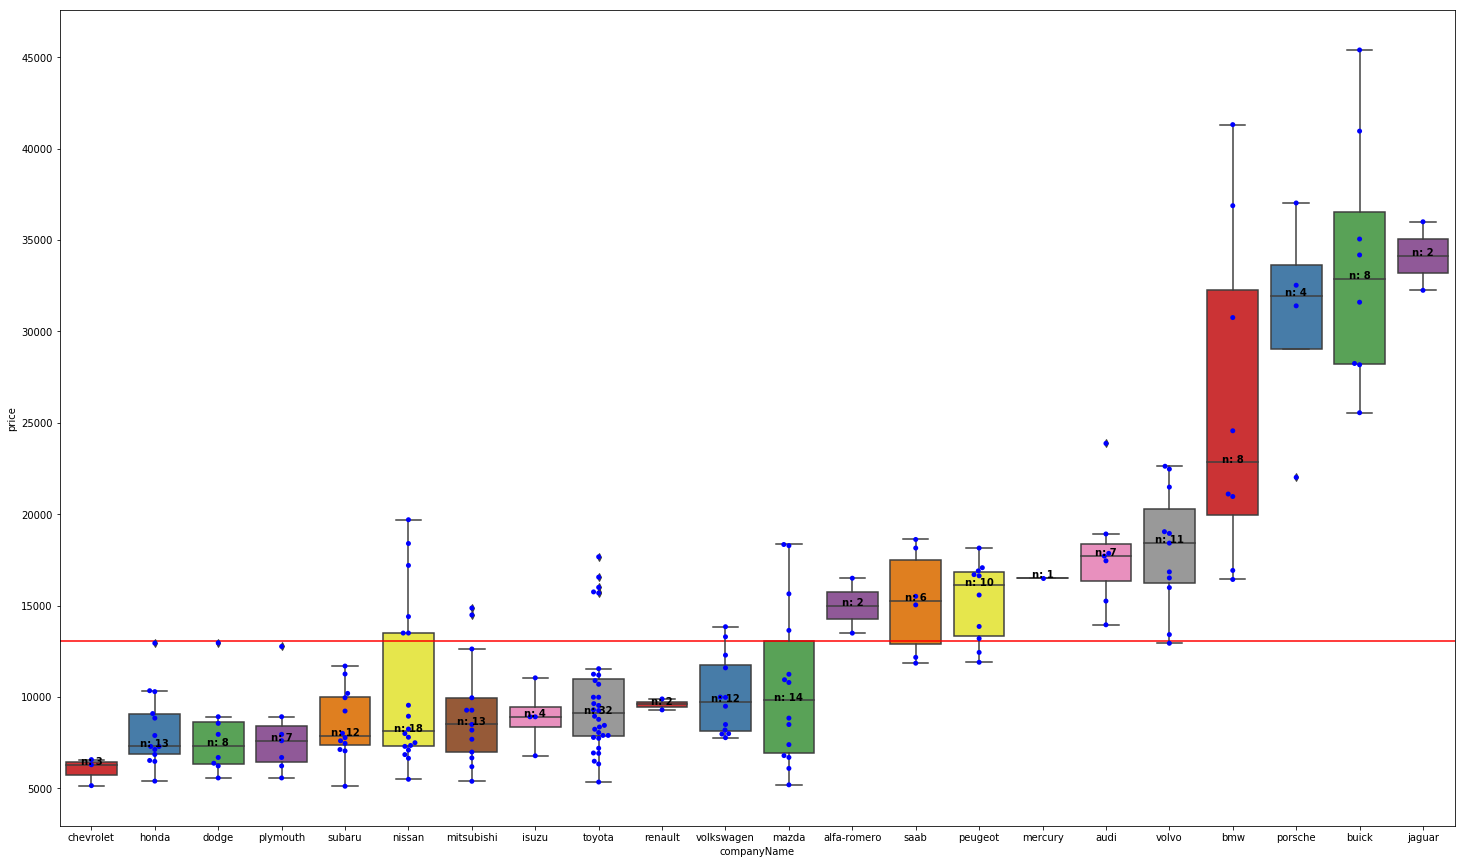

In [19]:
print(car.price.describe())
plt.figure(figsize=(25,15))
plt.axhline(y=car['price'].mean(), color='r')

#Order the box plots in acending order of median value
dfm = pd.DataFrame(car[['companyName','price']].groupby(['companyName']).median().sort_values(by='price',ascending=True))
l =list(dfm.index.get_values())
ax = sns.boxplot(x='companyName', y='price', data=car, palette="Set1",order=l)

# Add jitter with the swarmplot function.
sns.swarmplot(x='companyName' , y='price', data=car, color="blue",order=l)

numberonboxplot(car,'companyName',ax)

Findings:

    - Most Of the features are having overlapping information. 
    - None of the features alone is explaining the cause of pricing.
    - For car companies such as mercury, audi, bmw, jaguar, buick, porsche,volvo - the car with minimum amount is higher than the population mean amount.
    - We can use LableEncoding with ascending mean amount for model building.
    - Based on the observations, we can't use all the categories for analysis as it may result in wrong conclusion due to high class imbalance
    - We need to group few categories and find some derived features to check the variance

#### By Grouping drivewheel, carbody and getting the mean price, it can be clearly visualized that rear wheel drive is on an average having higher value for all car body type.

                 price                                                        
carbody    convertible       hardtop     hatchback         sedan         wagon
drivewheel                                                                    
4wd                0.0      0.000000  12731.083500  12647.333333   9095.750000
fwd            11595.0   8249.000000   8350.583333   9811.418182   9997.333333
rwd            25812.0  22565.166667  15424.194444  21415.470588  16994.222222


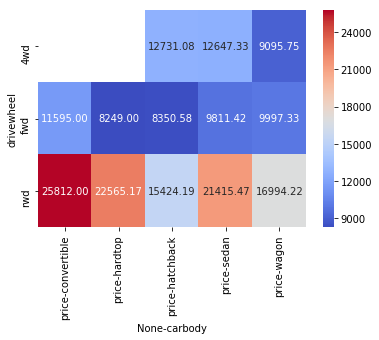

In [20]:
# grouping results
car_gp = car[['drivewheel','carbody','price']]
car_gp1 = car_gp.groupby(['drivewheel','carbody'],as_index=False).mean()
pivot_by_wheeltype = car_gp1.pivot(index='drivewheel',columns='carbody')
print(pivot_by_wheeltype.fillna(0))

sns.heatmap(pivot_by_wheeltype, annot=True, fmt='.2f',cmap='coolwarm')

Finding :
    - rwd - Rear wheel drive car on an average higher price than 4 wheel drive and forward wheel drive cars. 

In [21]:
car_gp2 = car[['drivewheel','companyName','price']]
car_gp2 = car_gp2.groupby(['drivewheel','companyName'],as_index=False).min()
car_gp2 = car_gp2.sort_values(by='price', ascending= True)


print('Average car price of the whole data set:', car['price'].mean())
print('\n')
print('Car Companies who manufactures cars with price much higher than average car price: ')
car_gp2[car_gp2['price'] >= car['price'].mean()]

Average car price of the whole data set: 13083.267345177665


Car Companies who manufactures cars with price much higher than average car price: 


,drivewheel,companyName,price
17,rwd,alfa-romero,13495.0
3,fwd,audi,13950.0
18,rwd,bmw,16430.0
23,rwd,mercury,16503.0
24,rwd,nissan,17199.0
0,4wd,audi,17450.0
27,rwd,porsche,22018.0
19,rwd,buick,25552.0
21,rwd,jaguar,32250.0


### B - Understanding the numerical variables
- Correlation Analysis of Numerical Columns to identify highly correlated features
- Pair plots to check the relationship of Price against other numerical columns
- Price vs Numerical Features Pair plot with regression line
- Ditribution and box Plot of Car Price
- Box Plots or Caterical Fetaures against Car Price
- Binning of Car Price/Horsepower based on price Range as Low, Mid and High
- Distribution plot based on Car Price Range against other numerical Features

In [22]:
'''
Get the numerical columns only
'''
cat_car = car.select_dtypes(include=['object'])
num_cols = set(car.columns).difference(set(cat_car.columns))
num_cols = list(num_cols)

#Check The Min, Max, Average of numerical features
car[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compressionratio,197.0,10.130051,3.969824,7.00,8.50,9.00,9.40,23.00
highwaympg,197.0,30.837563,6.913017,16.00,25.00,30.00,36.00,54.00
carlength,197.0,173.980711,12.340519,141.10,166.30,173.20,183.10,208.10
carwidth,197.0,65.895939,2.154299,60.30,64.00,65.50,66.90,72.30
enginesize,197.0,126.284264,40.827417,61.00,97.00,111.00,141.00,326.00
horsepower,197.0,103.644670,39.185139,48.00,70.00,95.00,116.00,288.00
peakrpm,197.0,5125.634518,471.580309,4150.00,4800.00,5200.00,5500.00,6600.00
boreratio,197.0,3.324772,0.271127,2.54,3.15,3.31,3.58,3.94
curbweight,197.0,2548.756345,515.514931,1488.00,2145.00,2414.00,2935.00,4066.00
wheelbase,197.0,98.779188,5.926620,86.60,94.50,97.00,102.40,120.90


#### i) Correlation Analysis Using Heatmap
- citympg and highwaympg are highly correlated > .97 and both are having a -ve(almost equal) correlation with Price, Horsepower and engine size. 
- Carlength is having a high +ve correlation with Carwidth(.84), Carwheel base(.87)
- Price is having +v correlation with curbweight, enginesize, horsepower, carwidth, carlength, wheelbase, boreratio
- Highly Correlated Independent Features are 
    - 1) citympg and highwaympg
    - 2) curbweight, Carwidth, wheelbase and carlength
    - 3) Enginesize and horsepower
    - 4) Enginesize, curbweight, wheelbase and carlength


We can eleminate few of the features after performing the P-value test, RFE and VIF


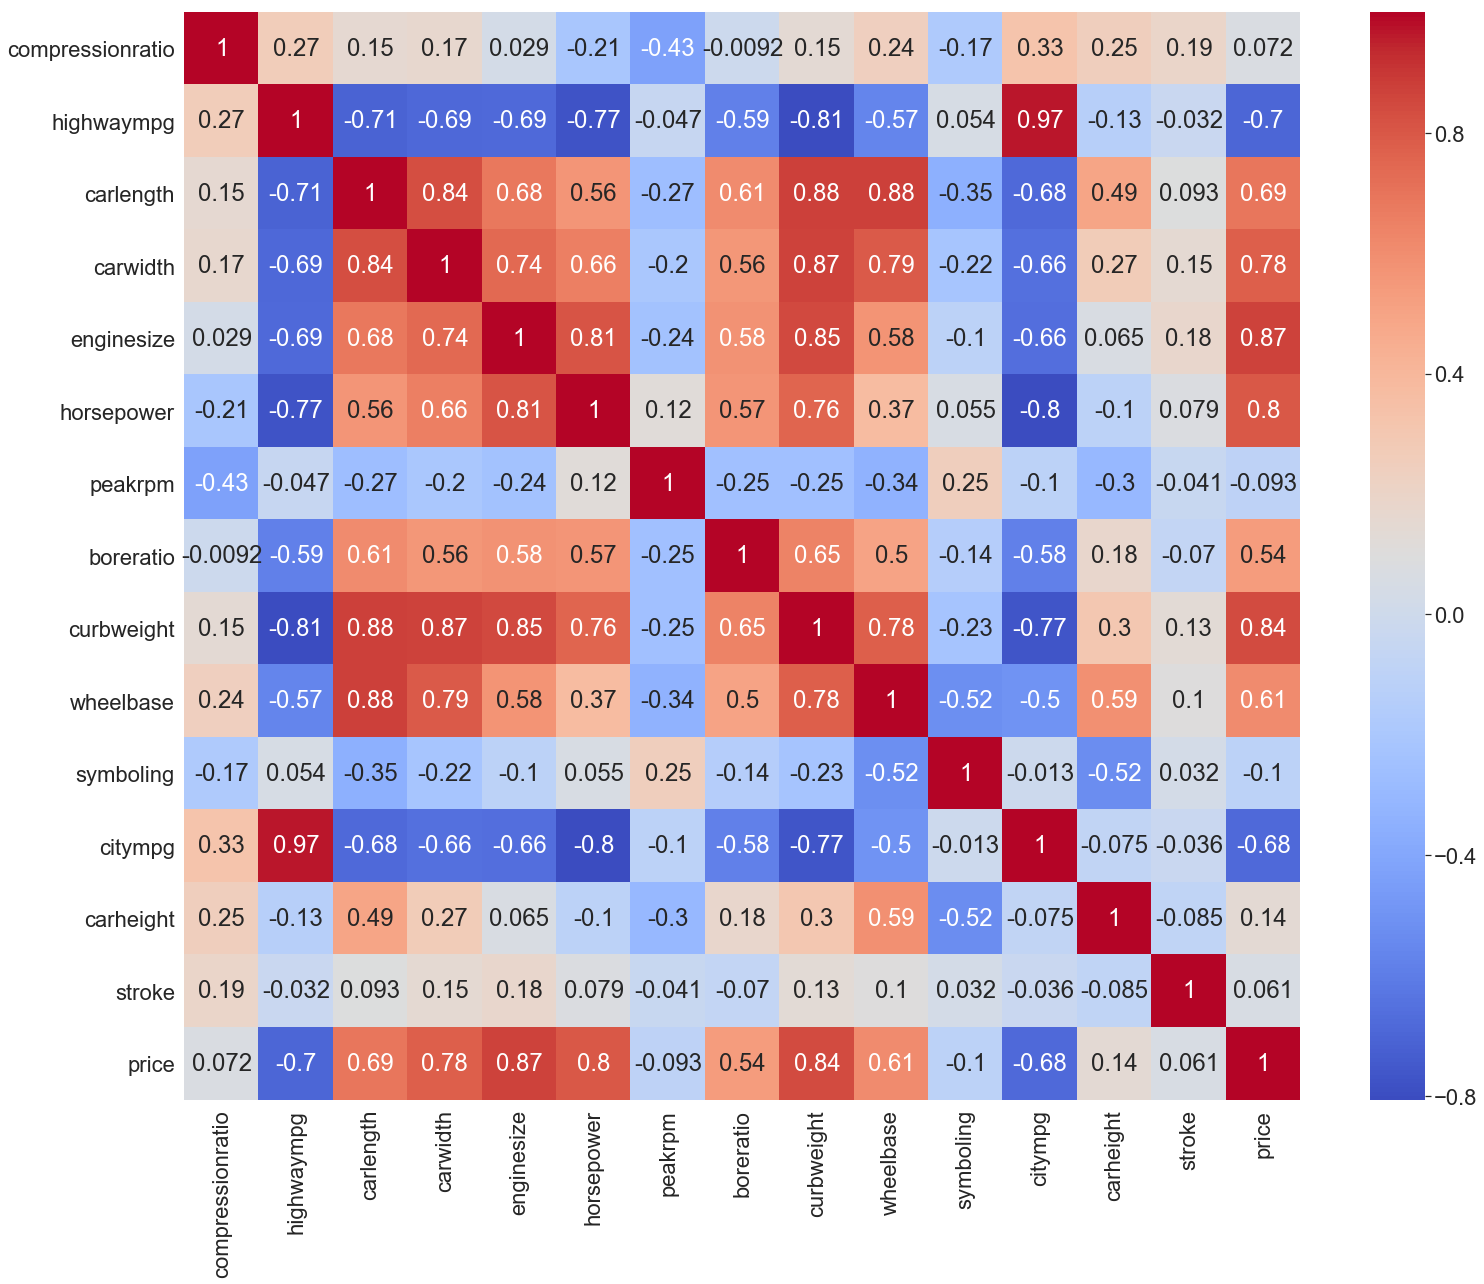

In [23]:
plt.figure(figsize=(25,20))
sns.set(font_scale=2)
sns.heatmap(car[num_cols].corr(),annot=True,cmap='coolwarm')

#### ii) Analysis of Numerical features using Pair Plot
- It is obvious that Price is having a linear relation ship with folliwng features:
    - curbweight 
    - enginesize
    - carlength
    - highwaympg
    - horsepower
    - wheelbase
    - carwidth
    - citymapg
    - bore ratio
    
- It seems there are two categories based on car compressionratio distribution but Price is not having linear correlation with compression ratio.

#### Numerical features such as peakrpm, stroke, carheight and compressionratio don't seem like having any linear realtionship with Price

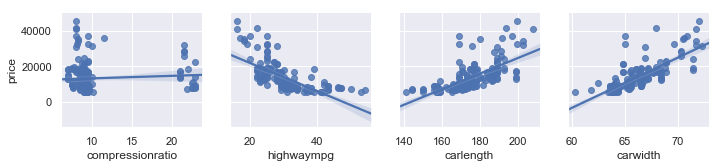

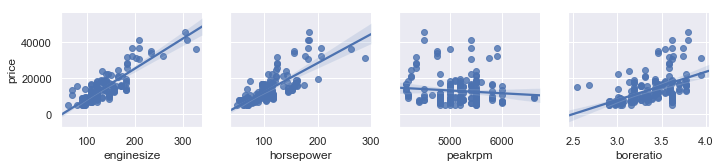

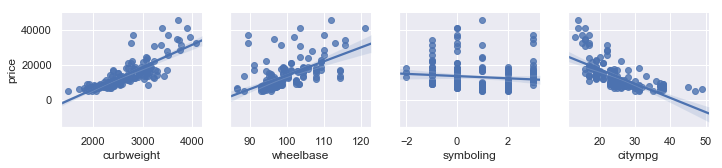

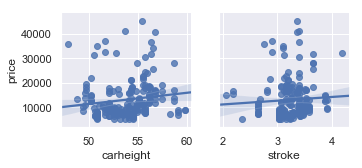

In [24]:
plt.rcParams['figure.figsize'] = (20,20)
#plt.figure(figsize=(24,16))
num_cols.remove('price')
sns.set(font_scale=1)
sns.pairplot(data=car, x_vars=num_cols[0:4], y_vars='price',kind="reg")
sns.pairplot(data=car, x_vars=num_cols[4:8], y_vars='price',kind="reg")
sns.pairplot(data=car, x_vars=num_cols[8:12], y_vars='price',kind="reg")
sns.pairplot(data=car, x_vars=num_cols[12:16], y_vars='price',kind="reg")
#sns.pairplot(data=car, x_vars=num_cols[12:16], y_vars='price',kind="reg")

Text(0.5, 1.0, 'Engine Size vs Price')

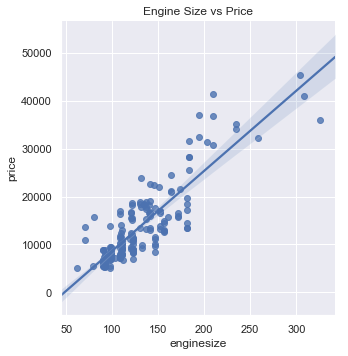

In [25]:
### Scatter plot of price and engine size
sns.lmplot(y='price',x="enginesize", data=car);
plt.title('Engine Size vs Price')


Text(0.5, 1.0, 'Curb weight vs Price')

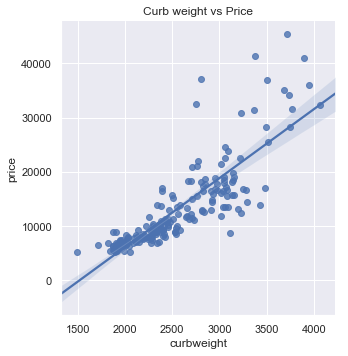

In [26]:
sns.lmplot(y='price',x="curbweight", data=car)
plt.title('Curb weight vs Price')

Findings:
    - Price is having a linear relationship with Curbweight and EngineSize

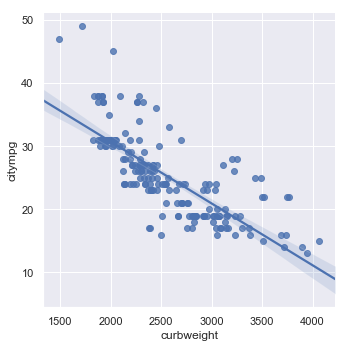

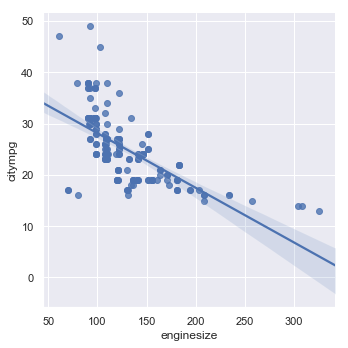

In [27]:
sns.lmplot(y='citympg',x='curbweight', data=car, fit_reg=True); #hue="companyName",
sns.lmplot(y='citympg',x='enginesize', data=car, fit_reg=True);

Findings :
    - Citympg decreases with increase in enginesize and curbweight

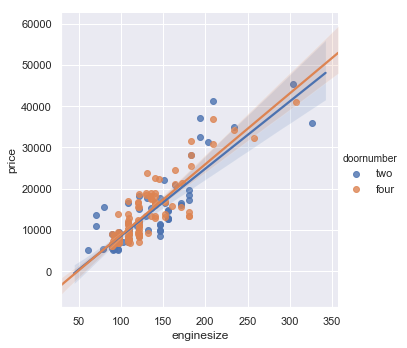

In [28]:
sns.lmplot(x= 'enginesize' , y='price', hue = 'doornumber', data=car)

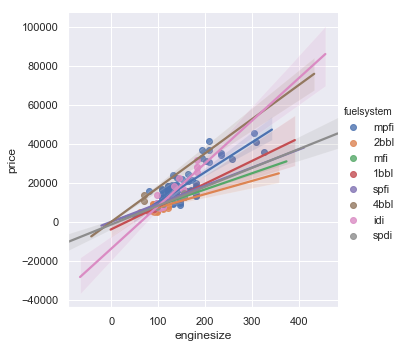

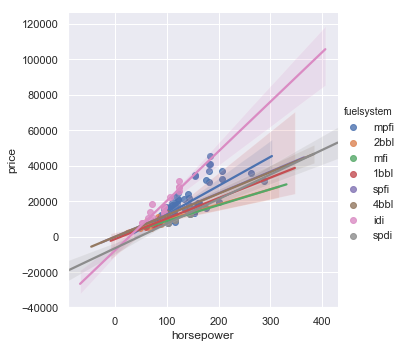

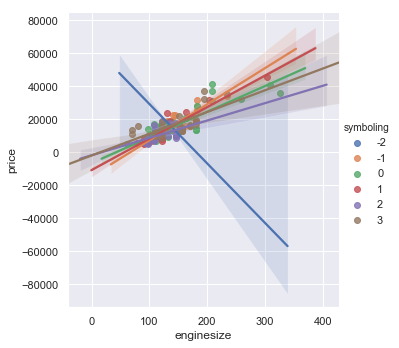

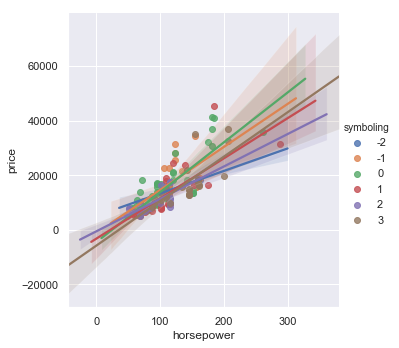

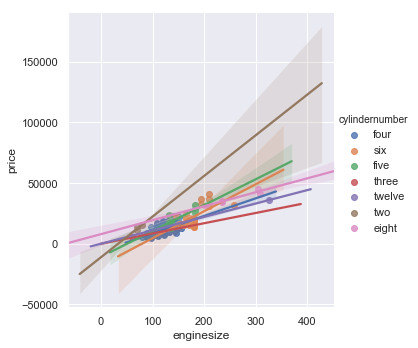

In [29]:
sns.lmplot(x= 'enginesize' , y='price', hue = 'fuelsystem', data=car)

sns.lmplot(x= 'horsepower' , y='price', hue = 'fuelsystem', data=car)

sns.lmplot(x= 'enginesize' , y='price', hue = 'symboling', data=car)

sns.lmplot(x= 'horsepower' , y='price', hue = 'symboling', data=car)

sns.lmplot(x= 'enginesize' , y='price', hue = 'cylindernumber', data=car)

Findings:
 - Door Number is not contributing significatnt variation to the price
 - Fuel system and horsepower or enginetype expains the price variation pretty well.
 - Horse Power and symboling(riskfactor) is explaining some of the price variation but not that clear.

#### iii) Distribution and box plot of amount

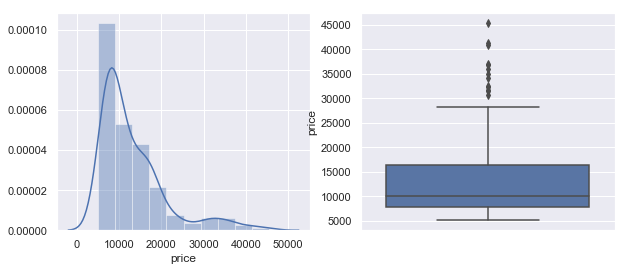

In [30]:
plt.rcParams['figure.figsize'] = (10,4)

fig, ax =plt.subplots(1,2, figsize=(10,4),squeeze=False)
s1 = sns.distplot(car.price,bins = 10, ax=ax[0][0])
#plt.show()

s2= sns.boxplot(y=car.price, ax=ax[0][1])
plt.show()

#### iv) Binning of Car Dataset based on Price and Horsepower and plot bar plots:

##### New metrics are derived if applicable and are used for analysis and modelling.

- Based on the car price, we can segregate cars into three categorical segments:
    - Low
    - Mid
    - High
- Based on horse power, the dataset can be segregated into three bins:
    - Low
    - Mid
    - High

In [31]:
bins = np.linspace(min(car["horsepower"]), max(car["horsepower"]), 4)
labels = ['Low','Mid','High']
car['horsepower_range'] = pd.cut(car.horsepower,bins=bins,labels=labels,include_lowest=True )

bins = np.linspace(min(car["price"]), max(car["price"]), 4)
labels = ['Low','Mid','High']
car['price_range'] = pd.cut(car.price,bins=bins,labels=labels,include_lowest=True)
'''
Print the count of cars in each category
'''
# There is not enough data in each category.
print(car["price_range"].value_counts())
print(car["horsepower_range"].value_counts())

Low     168
Mid      19
High     10
Name: price_range, dtype: int64
Low     157
Mid      38
High      2
Name: horsepower_range, dtype: int64


- curbweight is correlated with carheight and carwidth so, we can derive new matrices by applying some generic formulas such deriving volume and desity
- horsepower and enginesize are correalted hence we can create a new feature as powerper volume size of the engine


In [32]:
# Generate new features
car['volume'] = car['carheight'] * car['carwidth'] * car['carlength']
car['density'] = car['curbweight'] / car['volume']
car['powerpervolume'] = car['horsepower'] / car['enginesize']

# Repopulate the Num_Cols List
#num_cols = set(car.columns).difference(set(cat_car.columns))
#num_cols = list(num_cols)

num_cols.append('volume')
num_cols.append('powerpervolume')
num_cols.append('density')

In [33]:
num_cols

['compressionratio',
 'highwaympg',
 'carlength',
 'carwidth',
 'enginesize',
 'horsepower',
 'peakrpm',
 'boreratio',
 'curbweight',
 'wheelbase',
 'symboling',
 'citympg',
 'carheight',
 'stroke',
 'volume',
 'powerpervolume',
 'density']

##### Plot bar plots to check the counts based on price and horsepower range

Text(0.5, 1.0, 'Horsepower Range')

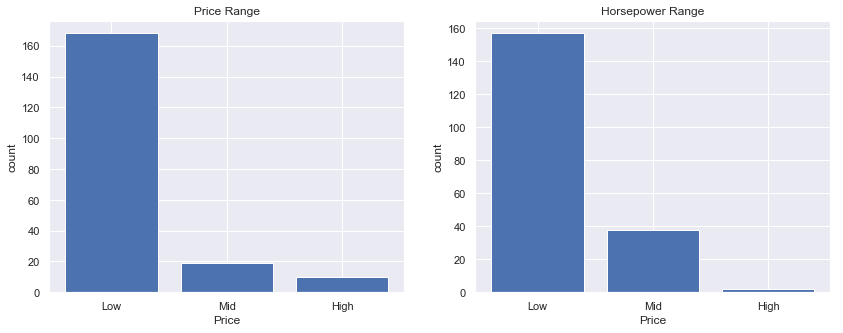

In [34]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
plt.bar(labels,car["price_range"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price Range")

plt.subplot(1, 2, 2)
plt.bar(labels,car["horsepower_range"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Horsepower Range")

#### v) Distribution Plot Price_range vs Other Numerical Features
- The distribution is overlapping hence not that helpful in interpreting them.

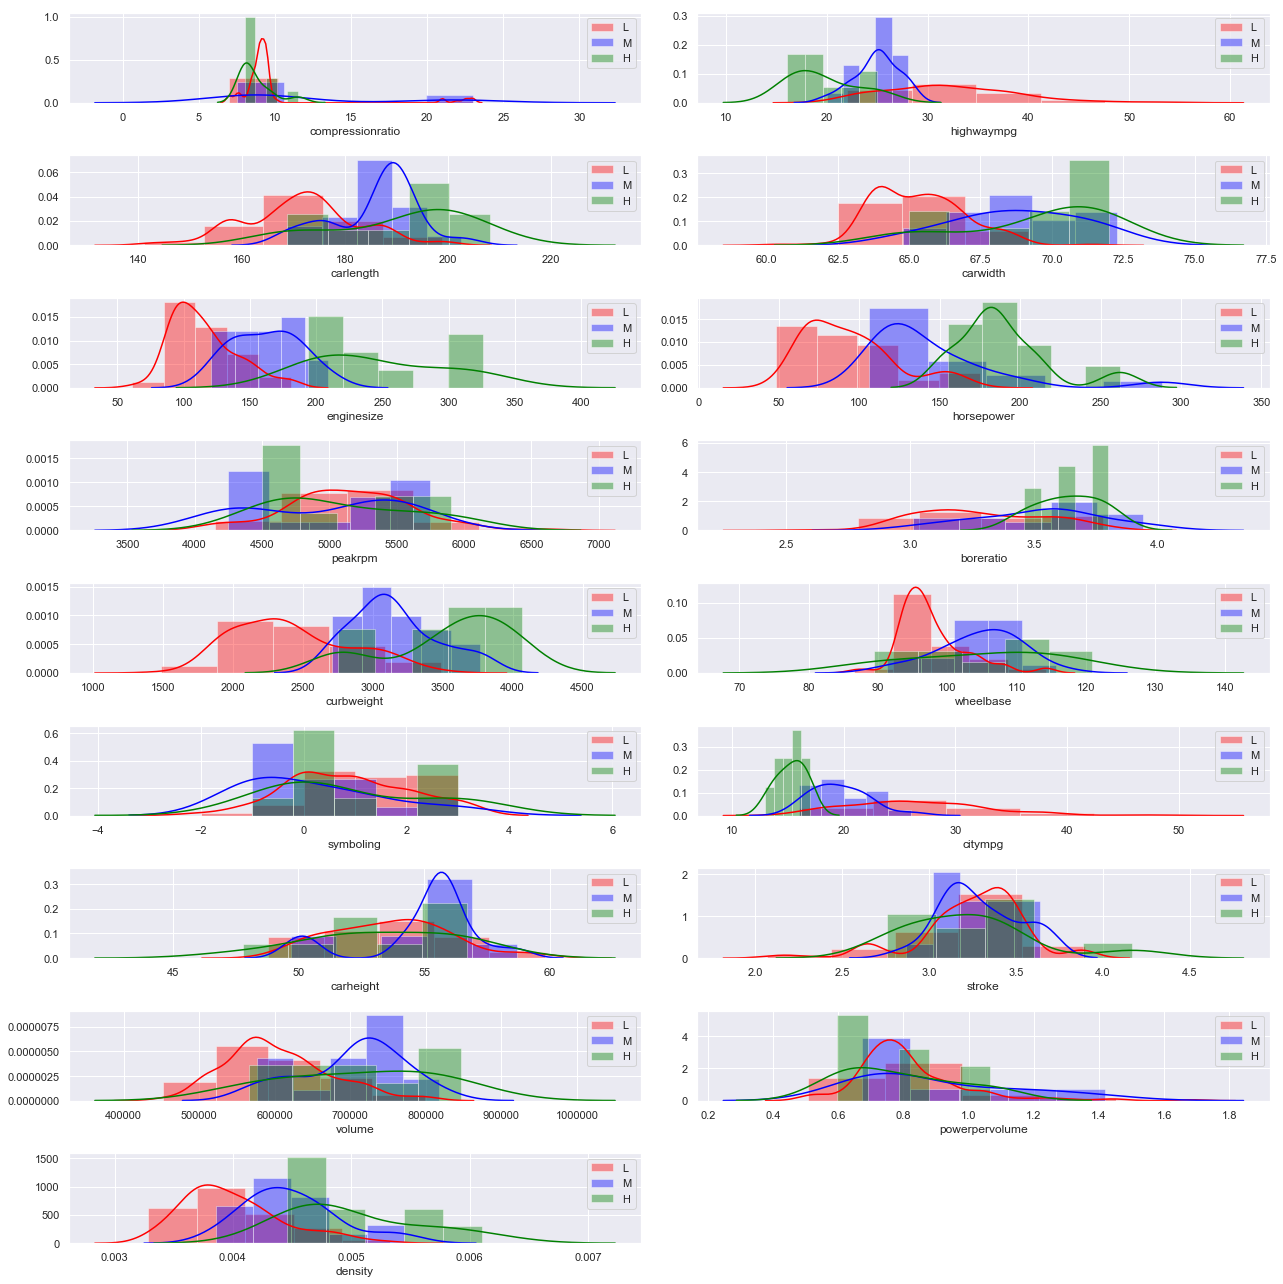

In [35]:
bins = 5
plt.figure(figsize=(18,18))
for i, feature in enumerate(num_cols):
    if len(num_cols) %2 == 0:
        rows = int(len(num_cols)/2)
    else:
        rows = int(len(num_cols)/2) +1

    plt.subplot(rows, 2, i+1)
    
    sns.distplot(car[car.price_range=='Low'][feature], bins=bins, color='red', label='L');
    sns.distplot(car[car.price_range=='Mid'][feature], bins=bins, color='blue', label='M');
    sns.distplot(car[car.price_range=='High'][feature], bins=bins, color='green', label='H');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


#### vi) Distribution Plot Horsepower_range vs Other Numerical Features
- The distribution is overlapping hence not that helpful in interpreting them.

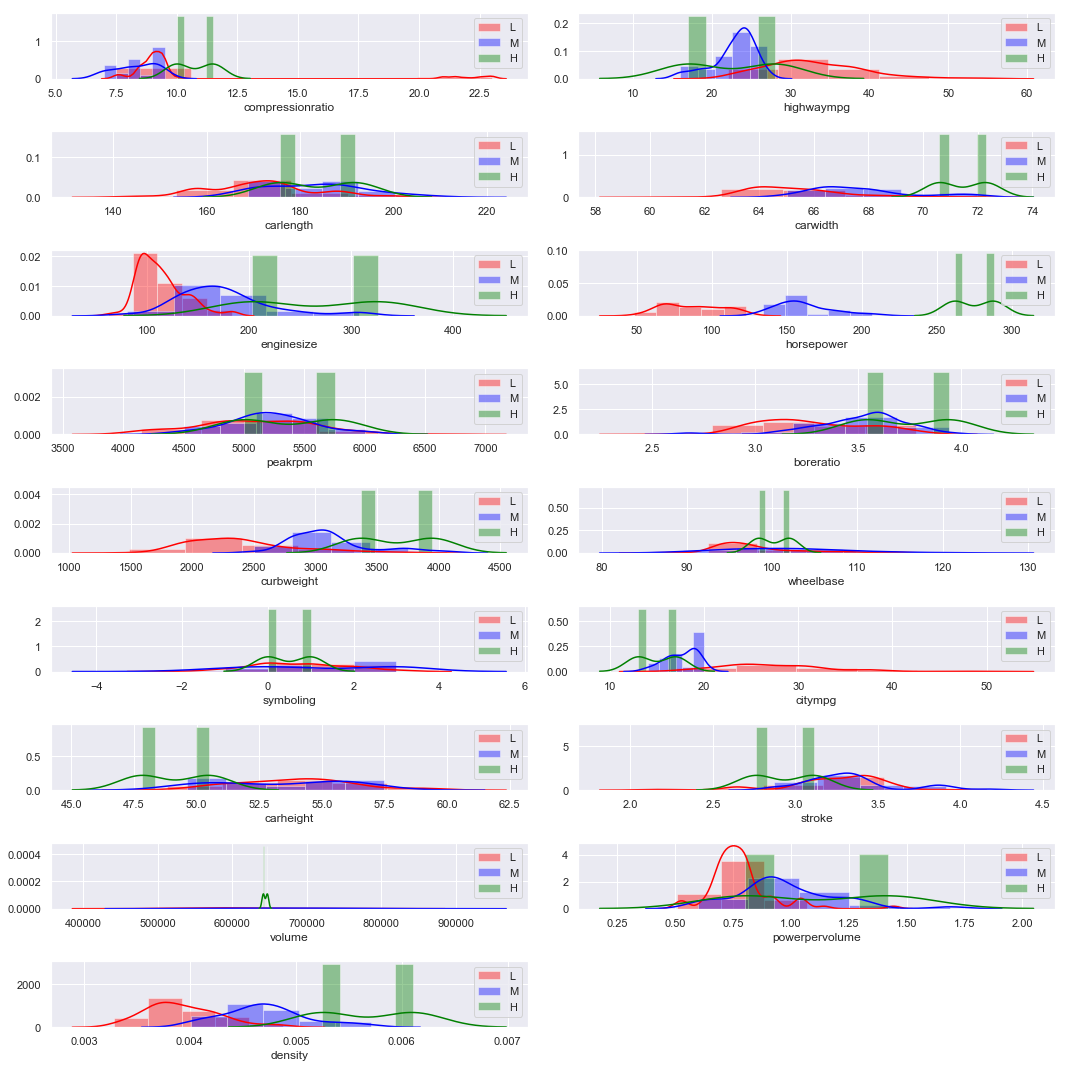

In [36]:
bins = 5
plt.figure(figsize=(15,15))
for i, feature in enumerate(num_cols):
    if len(num_cols) %2 == 0:
        rows = int(len(num_cols)/2)
    else:
        rows = int(len(num_cols)/2) +1
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(car[car.horsepower_range=='Low'][feature], bins=bins, color='red', label='L');
    sns.distplot(car[car.horsepower_range=='Mid'][feature], bins=bins, color='blue', label='M');
    sns.distplot(car[car.horsepower_range=='High'][feature], bins=bins, color='green', label='H');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### P-Value Analysis - Pearsonr  Correlation Analysis
- Approach :
 - If p-value is  <  0.001: then strong evidence that the correlation is significant.
 - p-value is  <  0.05: then moderate evidence that the correlation is significant.
 - p-value is  <  0.1: then weak evidence that the correlation is significant.
 - p-value is  >  0.1: then no evidence that the correlation is significant.

In [37]:
from scipy import stats

for col in num_cols: 
    pearson_coef, p_value = stats.pearsonr(car[col], car['price'])
    
    print(col,':')
    print("The PearsonR between feature and price is {} with a P-value = {}".format(pearson_coef, round(p_value,5)))
    
    if p_value < 0.001:
        print('Correlation between feature and price is statistically significant. P-value less than .001.')
    elif p_value < 0.05:
        print('Correlation between feature and price is statistically significant.')
    elif p_value < 0.1:
        print('Correlation between feature and price is statistically weak.')
    else:
        print('Correlation between feature and price is statistically not significant.')
    print('\n')


compressionratio :
The PearsonR between feature and price is 0.07181733576622817 with a P-value = 0.31592
Correlation between feature and price is statistically not significant.


highwaympg :
The PearsonR between feature and price is -0.6984775813407614 with a P-value = 0.0
Correlation between feature and price is statistically significant. P-value less than .001.


carlength :
The PearsonR between feature and price is 0.6943867478903267 with a P-value = 0.0
Correlation between feature and price is statistically significant. P-value less than .001.


carwidth :
The PearsonR between feature and price is 0.7796415540768478 with a P-value = 0.0
Correlation between feature and price is statistically significant. P-value less than .001.


enginesize :
The PearsonR between feature and price is 0.8710015777272826 with a P-value = 0.0
Correlation between feature and price is statistically significant. P-value less than .001.


horsepower :
The PearsonR between feature and price is 0.799034964

## Dummy variables creation wherever applicable

##### 1 - Dealing with categorical columns having two values : doornumber, aspiration and fueltype. 
    - Encoding with 0 and 1.
    - doornumber is can be converted to numeric value four to 4 and two to 2.

In [38]:
print(pd.concat([car['doornumber'].value_counts(),car['doornumber'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

print(pd.concat([car['aspiration'].value_counts(),car['aspiration'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

print(pd.concat([car['fueltype'].value_counts(),car['fueltype'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

bin_cat = {"doornumber":{"four": 4, "two": 2},
           "aspiration":{"std":1,"turbo":0},
           "fueltype":{"gas":1,"diesel":0}}

car.replace(bin_cat, inplace=True)

      doornumber  doornumber
four         111       56.35
two           86       43.65
       aspiration  aspiration
std           161       81.73
turbo          36       18.27
        fueltype  fueltype
gas          178     90.36
diesel        19      9.64


##### 2 - Dealing with cylindernumber categorical column

In [39]:
print(pd.concat([car['cylindernumber'].value_counts(),car['cylindernumber'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

#Create Dummies for Four, Six, Five  CylinderNumber and Remove other columns
car= pd.get_dummies(car,columns=['cylindernumber'])
car.drop(['cylindernumber_eight','cylindernumber_two','cylindernumber_twelve','cylindernumber_three'],axis=1,inplace=True)

        cylindernumber  cylindernumber
four               154           78.17
six                 22           11.17
five                11            5.58
eight                5            2.54
two                  3            1.52
twelve               1            0.51
three                1            0.51


- As you can see there are less than 5 % of data for few categories, we can't use them for modelling what we will do, we first apply dummy to create individual columns for each cylinder type then drop the columns correspoding to cylinders :eight (2.54 %),two (1.52%),twelve 0.51% and three  0.51%.

##### 3 - Dealing with carbody categorical column

- As you can see there are less than 5 % of data for few categories, we can't use them for modelling. What we will do, we first apply dummy to create individual columns for each carbody type then drop the columns correspoding to carbody :hardtop(3.55%) and convertible(2.54%)

In [40]:
print(pd.concat([car['carbody'].value_counts(),car['carbody'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

# Create Dummies and drop hardtop and convertible
car= pd.get_dummies(car,columns=['carbody'])
car.drop(['carbody_hardtop','carbody_convertible'],axis=1,inplace=True)

             carbody  carbody
sedan             92    46.70
hatchback         68    34.52
wagon             25    12.69
hardtop            7     3.55
convertible        5     2.54


##### 4 - Dealing with drivewheel categorical column
- Remove 4wd category as having only 4.57% of the data after performing one hot encoder

In [41]:
print(pd.concat([car['drivewheel'].value_counts(),cat_car['drivewheel'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

# Create Dummies and Drop 4wd
car= pd.get_dummies(car,columns=['drivewheel'])
car.drop(['drivewheel_4wd'],axis=1,inplace=True)

     drivewheel  drivewheel
fwd         117       59.39
rwd          71       36.04
4wd           9        4.57


##### 5 - Dealing with enginelocation categorical column
- Remove rear enginelocation category as having only 1.02% of the data by performing one hot encoder i.e front =1, rear =0

In [42]:
print(pd.concat([car['enginelocation'].value_counts(),car['enginelocation'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

# Update EngineLocation
bin_cat = {"enginelocation":{"front": 1, "rear": 0}}
car.replace(bin_cat, inplace=True)

       enginelocation  enginelocation
front             195           98.98
rear                2            1.02


##### 6 - Dealing with enginetype categorical column

- The engine type of a vehicle states how the engine is configured or its operations in term of design of valves, cam shaft and cylinders. Here there are seven engine types: 
    - ohc (OverHead Cam) - 73.60%
    - dohc (Dual OverHead Cam) - 5.08%
    - dohcv (Dual OverHead Cam and Valve) - 0.51%
    - l (L engine), ohc (OverHead Cam) - 5.58%
    - ohcf (OverHead Cam and Valve F engine) - 7.11%
    - ohcv (OverHead Cam and Valve) - 6.6%
    - rotor (Rotary engine) - 1.52%
    
- Here 'dohcv' is having one records and its withing the range of 'dohc' hence update the category type to 'dohc'
- After applying Onehotencoding remove the column correspoding to 'rotor' enginetype 

       enginetype  enginetype
ohc           145       73.60
ohcf           14        7.11
ohcv           13        6.60
l              11        5.58
dohc           10        5.08
rotor           3        1.52
dohcv           1        0.51


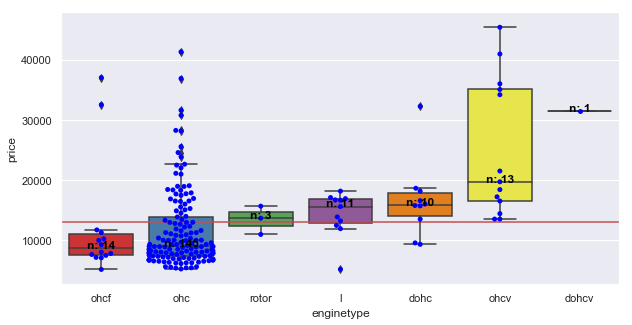

In [43]:
print(pd.concat([car['enginetype'].value_counts(),car['enginetype'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))
plt.figure(figsize=(10,5))
# Box Plot See the dictribution for each Engine Type
plotBoxPlot('enginetype')

# Update dohcv to dohc
eng_upd = {"enginetype":{"dohcv": "dohc"}}
car.replace(eng_upd, inplace=True)

# Create Dummies
car= pd.get_dummies(car,columns=['enginetype'])

# Drop Rotor
car.drop(['enginetype_rotor'],axis=1,inplace=True)

##### 7 - Dealing with fuelsystem categorical column
- Fuel System 1bbl and 2bbl the dictibution is almost same - Lets update them as 2bbl
- Fuel system spfi having only 1 data and price is just higher than the mean of spdi. Hence update it to spdi. 
- Fuel system 4bbl and mfi having only 2 and 1 data respectively and have price just less than or equal to mean of idi. Hence update them to idi
- Apply OnehotEncoding and then drop the column correspoding to spdi(as having least no of values)

      fuelsystem  fuelsystem
mpfi          91       46.19
2bbl          63       31.98
idi           19        9.64
1bbl          11        5.58
spdi           9        4.57
4bbl           2        1.02
mfi            1        0.51
spfi           1        0.51


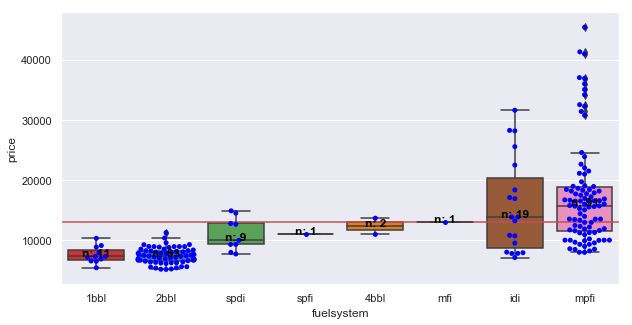

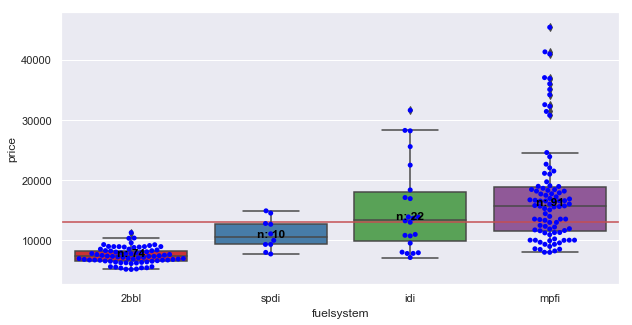

In [44]:
print(pd.concat([car['fuelsystem'].value_counts(),car['fuelsystem'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

# Plot box plot for fuelsystem type distribution
plt.figure(figsize=(10,5))
plotBoxPlot('fuelsystem')

# Update dohcv to dohc
fuel_upd = {"fuelsystem":{"1bbl": "2bbl","spfi":"spdi","4bbl":"idi","mfi":"idi"}}
car.replace(fuel_upd, inplace=True)

#Check the dictribution after update
plt.figure(figsize=(10,5))
plotBoxPlot('fuelsystem')

# Create Dummies
car= pd.get_dummies(car,columns=['fuelsystem'])

# Drop Rotor
car.drop(['fuelsystem_spdi'],axis=1,inplace=True)

##### 8 - Split Engine Size to Low Mid High

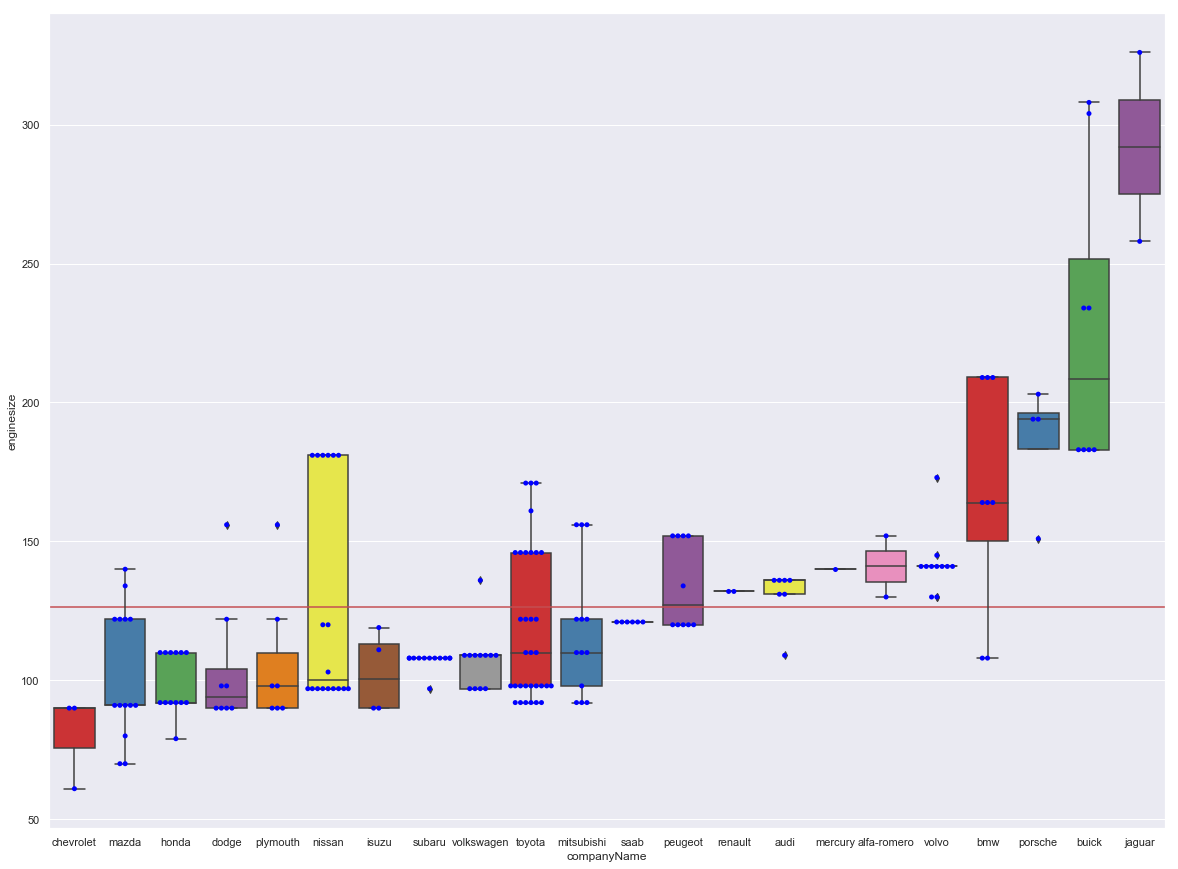

In [45]:
plt.figure(figsize=(20,15))
# Plot a Horizontal Line at mean price of complete dataset
plt.axhline(y=car['enginesize'].mean(), color='r')

# Order the box plots in acending order of median value
dfm = pd.DataFrame(car[['companyName','enginesize']].groupby(['companyName']).median().sort_values(by='enginesize',ascending=True))
l =list(dfm.index.get_values())
ax = sns.boxplot(x='companyName', y='enginesize', data=car, palette="Set1",order=l)
# Add jitter with the swarmplot function.
sns.swarmplot(x='companyName' , y='enginesize', data=car, color="blue",order=l)

#if col!='symboling':
    #numberonboxplot(car,'companyName',ax)

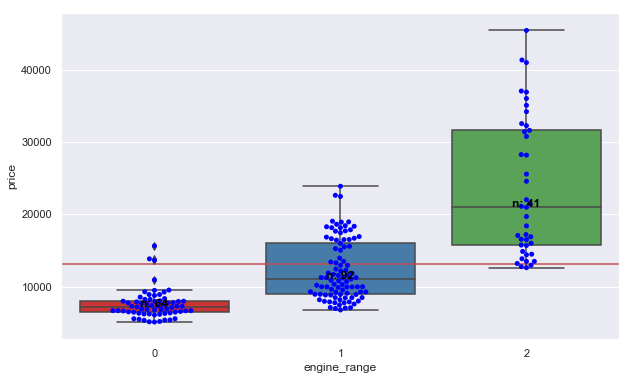

In [46]:
# Create Bins as Engine Size
bins = [0,100,150,500]
labels = [0,1,2]
car['engine_range'] = pd.cut(car.enginesize,bins=bins,labels=labels,include_lowest=True )
plt.figure(figsize=(10,6))
plotBoxPlot('engine_range')

##### 9 - Split Horse Power to High and Low

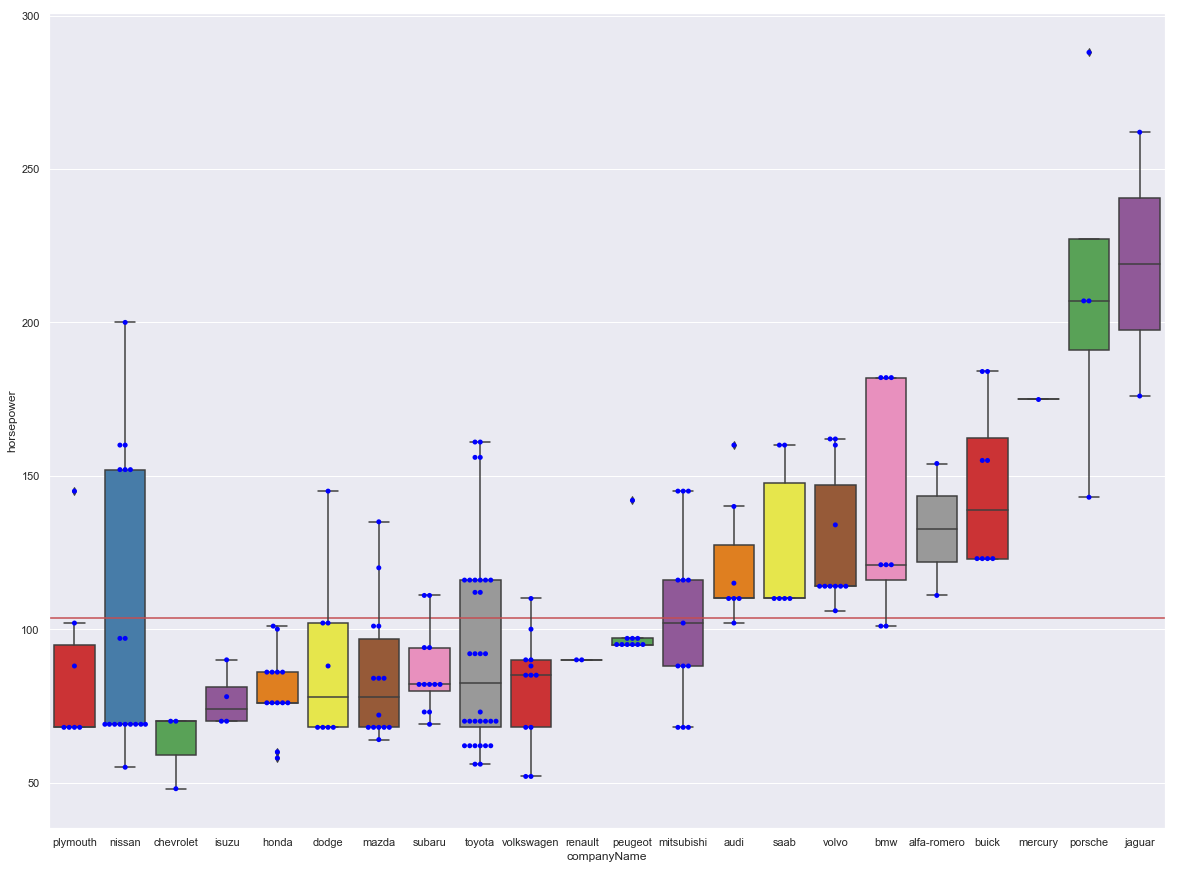

In [47]:
plt.figure(figsize=(20,15))
# Plot a Horizontal Line at mean price of complete dataset
plt.axhline(y=car['horsepower'].mean(), color='r')

# Order the box plots in acending order of median value
dfm = pd.DataFrame(car[['companyName','horsepower']].groupby(['companyName']).median().sort_values(by='horsepower',ascending=True))
l =list(dfm.index.get_values())
ax = sns.boxplot(x='companyName', y='horsepower', data=car, palette="Set1",order=l)
# Add jitter with the swarmplot function.
sns.swarmplot(x='companyName' , y='horsepower', data=car, color="blue",order=l)

#if col!='symboling':
    #numberonboxplot(car,'companyName',ax)

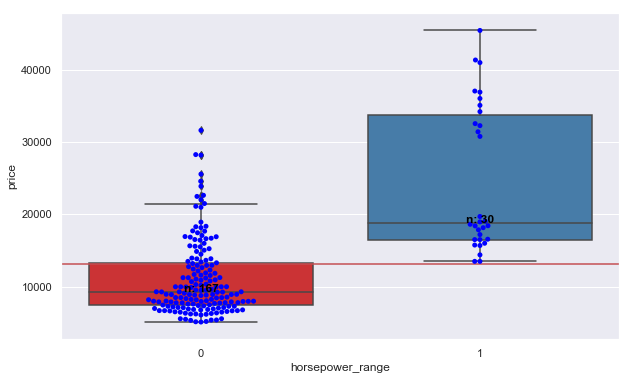

In [48]:
# Create Bins as per hosrse power and car type distribution
bins = [0,150,300]
labels = [0,1]
car['horsepower_range'] = pd.cut(car.horsepower,bins=bins,labels=labels,include_lowest=True )

plt.figure(figsize=(10,6))
plotBoxPlot('horsepower_range')

##### 10 - Dealing with companyName categorical column
- Apply Dummy to do one hot encoding on company name

             companyName  companyName
toyota                32        16.24
nissan                18         9.14
mazda                 14         7.11
honda                 13         6.60
mitsubishi            13         6.60
subaru                12         6.09
volkswagen            12         6.09
volvo                 11         5.58
peugeot               10         5.08
buick                  8         4.06
bmw                    8         4.06
dodge                  8         4.06
plymouth               7         3.55
audi                   7         3.55
saab                   6         3.05
isuzu                  4         2.03
porsche                4         2.03
chevrolet              3         1.52
jaguar                 2         1.02
renault                2         1.02
alfa-romero            2         1.02
mercury                1         0.51


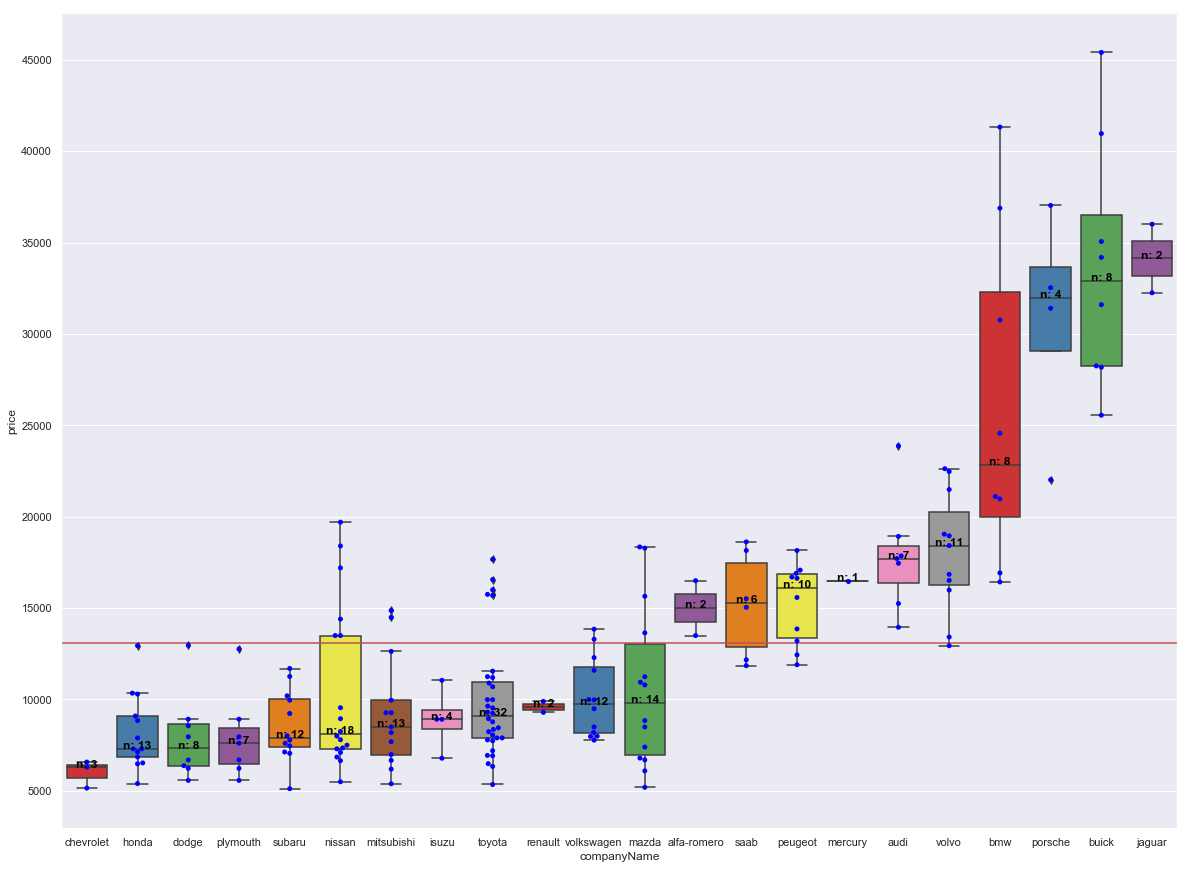

In [49]:
print(pd.concat([car['companyName'].value_counts(),car['companyName'].
                 value_counts(normalize=True).apply(lambda x: round(x*100,2))],axis=1))

# Plot box plot for fuelsystem type distribution
plt.figure(figsize=(20,15))
plotBoxPlot('companyName')


# Keep a Back Up Copy for further Model Testing as we may need to encode based on car company name
carbackup = car

# Create Dummies
car= pd.get_dummies(car,columns=['companyName'],drop_first=True)



In [50]:
# Drop the columns price_range
car.drop(['price_range'],axis=1,inplace=True)

## Model Building
### Approach:
    - Train test split
    - Build different models with complete data to understand the p-value, VIF
    - Perform RFE to further eliminate features
    - Identify the features for final model building
    - Train the model with Train Set
    - Check the R2 and Adjusted R2 on both train and test set
    - Perform Residual Analysis

### Function for train test split

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def prepareTrainTestSets(car,randomness=42):
    '''
    Step 1: Train Test Split
    '''    
    np.random.seed(0)
    df_train, df_test = train_test_split(car, train_size = 0.8, test_size = 0.2, random_state = randomness)

    '''
    Step 2: Scale the training data
    '''
    scaler = MinMaxScaler()
    all_cols = list(car.columns)
    df_train[all_cols] = scaler.fit_transform(df_train[all_cols])

    '''
    Step 3: Create the X_train and y_train
    '''
    y_train = df_train.pop('price')
    X_train = df_train
        
    '''
    Setp 4: Scale Test Set and create the X_test and y_test
    '''
    # Scale Test Set
    df_test[all_cols] = scaler.transform(df_test[all_cols])
    y_test = df_test.pop('price')
    X_test = df_test
    
    return y_train,X_train,y_test,X_test

In [52]:
# Get the Train and Test Dataframe
y_train,X_train,y_test,X_test = prepareTrainTestSets(car)

# Check the shape
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(157,)
(157, 60)
(40,)
(40, 60)


## Model Building and Test Evaluations 

### Model 1: Using Sklearn LinearRegression

In [53]:
'''
Step 1: Train the Model the model using Training Set
'''
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#num_cols.remove('price')

# fit the model to the training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

######  Evaluation Using R-Square Value

In [54]:
'''
Step 2: Predict and Evaluate the training MSE and R-Square
'''
from sklearn.metrics import mean_squared_error, r2_score

#Make Prediction Using the test set
y_hat = lr.predict(X_train)
mse = mean_squared_error(y_train, y_hat)
r_squared = r2_score(y_train, y_hat)

print('Model 1 Evaluation:')

print('\tTrain Mean_Squared_Error :' ,mse)
print('\tTrain R_square_value :',r_squared)

'''
Step 3: Predict and Evaluate the training MSE and R-Square
'''
y_hat_test = lr.predict(X_test)
mse = mean_squared_error(y_test, y_hat_test)
r_squared = r2_score(y_test, y_hat_test) 

print('\tTest Mean_Squared_Error :' ,round(mse,3))
print('\tTest R_square_value :',round(r_squared,3))


Model 1 Evaluation:
	Train Mean_Squared_Error : 0.0011665845368002527
	Train R_square_value : 0.9743357333659073
	Test Mean_Squared_Error : 0.014
	Test R_square_value : 0.875


#### Finding: 
    - When all the features are used, the model is slightly overfitting i.e. it is performing well on train data but not so good in test data.
    - So let's build another model with all the features but using Statsmodel OLS library to get the P-Values for each feature. Before that, let's identify 15 significant features using RFE.

#### RFE - Recursive feature Elemination

**Function** To Select first the 15 features which seems significant.

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def getColForAnalysisUsingREF(X_train, y_train, featureCount,colstodrop):
    # Running RFE with the output number of the variable equal to 20
    lm = LinearRegression()
    X_train_n = X_train.drop(colstodrop,axis=1)
    lm.fit(X_train_n, y_train)

    rfe = RFE(lm, featureCount)             # running RFE
    rfe = rfe.fit(X_train_n, y_train)

    # Print the Output of RFE
    print('RFE Output:\n' , list(zip(X_train_n.columns,rfe.support_,rfe.ranking_)))

    # Create the columns to include the significant features identified by RFE
    colsForAnalysis = []
    for i,j,k in list(zip(X_train_n.columns,rfe.support_,rfe.ranking_)):
        if j:
            colsForAnalysis.append(i)
    return colsForAnalysis

Findings: 
- The test R-Square 0.87 is much lower than the Train R-Square 0.97. This is a case of slight overfitting i.e. the model is fitting the training data but unable to predict on test data. Hence we need to Check p-value and vif for selecting the features.
- Let's tune the model.


## Function for Model Building using statsmodel OLS and evaluation

In [56]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate


from sklearn.metrics import mean_squared_error, r2_score

def buildModel(colstodrop,y_train,X_train,y_test,X_test):
    
    #y_train,X_train,y_test,X_test = prepareTrainTestSets(car)
    
    '''
    Step 1: Train the model
    '''
    if not colstodrop:
        X_m = X_train
    else:
        X_m = X_train.drop(colstodrop,axis=1)
    X_m = sm.add_constant(X_m)
    # print('shape X_m after constant:',X_m.shape)
    lm = sm.OLS(y_train,X_m).fit()
    #print(lm.summary(),'\n') 
    y_hat_train = lm.predict(X_m)

    '''
    Step 2: Get the VIF
    '''
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    if not colstodrop:
        X_m = X_train
    else:
        X_m = X_train.drop(colstodrop,axis=1)
    if len(X_m.columns) > 1:
        vif['Features'] = X_m.columns
        vif['VIF'] = [variance_inflation_factor(X_m.values, i) for i in range(X_m.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #print(vif)
    
    '''
    Step 3: Predict On Test Set
    '''
    #Predict on test data and Evaluate
    # print('shape X_test before constant:',X_test.shape)
    if not colstodrop:
        X_test_m = X_test
    else:
        X_test_m = X_test.drop(colstodrop,axis=1)
    # print('shape X_test_m before constant:',X_test_m.shape)
    X_test_m = sm.add_constant(X_test_m, has_constant='add')
    # print('shape X_test_m after constant:',X_test_m.shape)
    y_hat = lm.predict(X_test_m)
    mse = mean_squared_error(y_test, y_hat)
    r_squared = r2_score(y_test, y_hat) 
    
    '''
    Step 4: Print the Results
    '''
    print('Training Results :')
    print('F-statistics :', lm.fvalue)
    print('R-Squared :', lm.rsquared)
    print('Adj R-Squared :', lm.rsquared_adj)
    print('\n')
    print('Testing Results :')
    print('Test Mean_Squared_Error :' ,mse)
    print('Test R_square_value :',r_squared)
    print('\n')
    
    '''
    Step 5: Create the View for P-value, VIF and Coefficients
    '''
    
    #Create a dataframe to hold the p-values 
    d = lm.pvalues.apply(lambda x:round(x,3)).to_dict()
    p_val = pd.DataFrame()
    p_val['Features'] = list(d.keys())
    p_val['p-value'] = list(d.values())
    
    ##Create a dataframe to hold the p-values and VIF by mergeing the dataframes
    # For Const the VIF will be zero. Or in case of single variable, VIF won''t be calculated.
    if vif.empty ==False:
        p_val = p_val.merge(vif, on ='Features', how='left')
        p_val.fillna(0,inplace=True)
        p_val.sort_values(by='p-value',ascending=False,inplace=True)
    
    print('P-value and VIF values for the features:')
    
    #Create and dataframe for Co-effs
    c = lm.params.apply(lambda x:round(x,3)).to_dict()
    coef = pd.DataFrame()
    coef['Features'] = list(c.keys())
    coef['Coeffs'] = list(c.values())
    pvif = p_val.merge(coef, on ='Features', how='left')
    pvif.fillna(0,inplace=True)
    
    print(tabulate(pvif, headers='keys', tablefmt='psql'))
    
    return lm, pvif, y_hat_train, y_hat 

### Model 2 : Using StatsModel Oridnary Least Square to check p-values for all the features
- Customised output for readability and better
- P-value, VIF and Co-effs on a single dataframe
- Use tabulate libaracy to display the dataframe in  much clearer way

In [57]:
# Perform Multilinear Regression using All Columns without RFE
y_train,X_train,y_test,X_test = prepareTrainTestSets(car)

colstodrop = []
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Drop Highly Correlated COlumns
# From Earlier Heat map we identified that following features are highly correlated
colstodrop = ['volume','carlength','citympg','curbweight']

# Identify columns using RFE
colsForAnalysis = getColForAnalysisUsingREF(X_train, y_train,20,colstodrop)
print('\n')
print('Significant columns after performing RFE :\n' , colsForAnalysis)

# Find the columns to drop excluding the columns identified as significant by RFE 
colstodrop = list(set(X_train.columns).difference(set(colsForAnalysis)))

colstodrop.append('volume')
colstodrop.append('carlength')
colstodrop.append('citympg')
colstodrop.append('curbweight')

Training Results :
F-statistics : 65.9386590117615
R-Squared : 0.9743357333659073
Adj R-Squared : 0.959559337425066


Testing Results :
Test Mean_Squared_Error : 0.014361503376468094
Test R_square_value : 0.874899607801083


P-value and VIF values for the features:
+----+------------------------+-----------+---------+----------+
|    | Features               |   p-value |     VIF |   Coeffs |
|----+------------------------+-----------+---------+----------|
|  0 | stroke                 |     0.96  |    6.71 |    0.003 |
|  1 | highwaympg             |     0.94  |   40.77 |   -0.009 |
|  2 | companyName_audi       |     0.905 |   15.57 |   -0.008 |
|  3 | carbody_sedan          |     0.88  |   12.63 |   -0.004 |
|  4 | companyName_chevrolet  |     0.87  |  inf    |    0.01  |
|  5 | enginesize             |     0.796 |  198.88 |   -0.093 |
|  6 | companyName_saab       |     0.709 |   12.25 |   -0.023 |
|  7 | horsepower             |     0.665 |  245.75 |    0.15  |
|  8 | cylindernumb

Manual Tuning:
    - The model is not performing well n the test set. This is clear case of overfitting.
    - Drop the columns having High P-value and High VIF
    - Then High P and Low VIF remove these first
    - Then Low P and High VIF remove these after the ones above 
    - check P-values and Correlation coefficient to select the features

### Model 3 :Including the features identified by REF and perform Interations

##### Including the features identified in RFE only

In [58]:
# create dataframe to hold the rediuals
train_res = pd.DataFrame()
test_res = pd.DataFrame()

# Perform the Train and Test
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m0'] = y_train - y_hat_train
test_res['m0'] = y_test - y_hat_test

Training Results :
F-statistics : 137.962870555361
R-Squared : 0.9503316277555369
Adj R-Squared : 0.9434433133566698


Testing Results :
Test Mean_Squared_Error : 0.013200605377001778
Test R_square_value : 0.8850119749557736


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | powerpervolume         |     0.272 |  2.2  |   -0.043 |
|  1 | companyName_renault    |     0.107 |  1.05 |   -0.085 |
|  2 | companyName_porsche    |     0.019 |  2.21 |    0.104 |
|  3 | companyName_honda      |     0.007 |  1.25 |   -0.047 |
|  4 | boreratio              |     0.001 |  3.15 |   -0.127 |
|  5 | const                  |     0     |  0    |    0.241 |
|  6 | companyName_dodge      |     0     |  1.2  |   -0.1   |
|  7 | companyName_subaru     |     0     | 16.87 |   -0.299 |
|  8 | companyName_plymouth   |     0  

#### Findings: Seems bit overfitted on test data

### Check the Correlation between numerical features:

Remember: Correlation is not Causation. So, need to exclude the features considering P-Value and Vif along with correlation.
 - Due to high correlation We have already removed these features before performing RFE 
     - volume
     - carlength
     - citympg
     - curbweight

##### Excluding the other features which are not identified

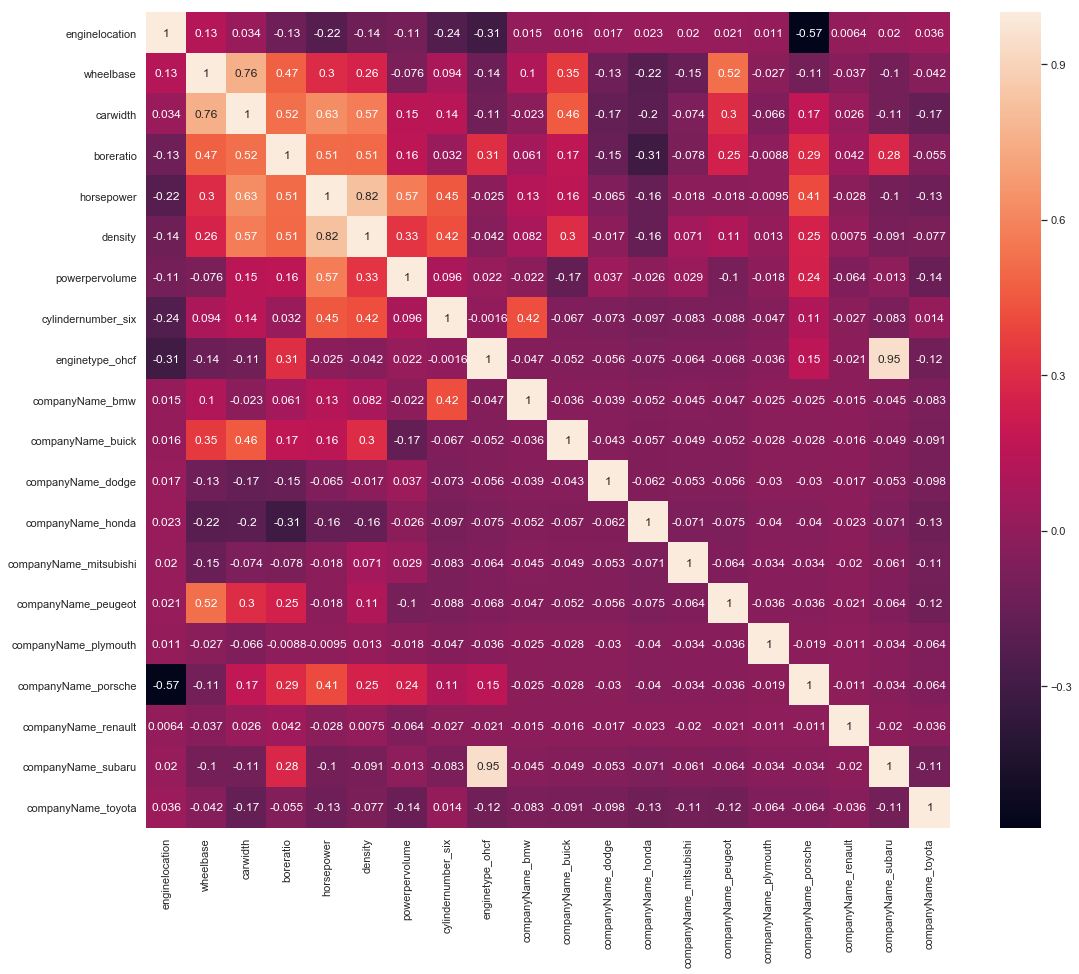

In [59]:
plt.figure(figsize=(18,15))
sns.set(font_scale=1)
sns.heatmap(X_train.drop(colstodrop,axis=1).corr(),annot=True)

#### Conclusion From Heatmap:
From the HeatMap, we can conclude that:
        - companyName_subaru highly correlated with enginetype_ohcf

##### First Remove the Highly Correlated Fetaures

In [60]:
# First Remove the Highly Correlated Fetaures
colstodrop.append('companyName_subaru')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m1'] = y_train - y_hat_train
test_res['m1'] = y_test - y_hat_test


Training Results :
F-statistics : 137.96287055536087
R-Squared : 0.9503316277555369
Adj R-Squared : 0.9434433133566698


Testing Results :
Test Mean_Squared_Error : 0.013200605377001812
Test R_square_value : 0.8850119749557733


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | powerpervolume         |     0.272 |  8.8  |   -0.043 |
|  1 | companyName_renault    |     0.107 |  1.05 |   -0.085 |
|  2 | enginetype_ohcf        |     0.056 |  1.6  |   -0.04  |
|  3 | companyName_porsche    |     0.019 |  1.74 |    0.104 |
|  4 | companyName_honda      |     0.007 |  1.33 |   -0.047 |
|  5 | boreratio              |     0.001 | 30.19 |   -0.127 |
|  6 | const                  |     0     |  0    |    0.541 |
|  7 | companyName_dodge      |     0     |  1.25 |   -0.1   |
|  8 | companyName_plymouth   |     0

##### Rebuild the Model by excluding the features having high p-value and vif
- Remove the features:
    - having high P-values p > .05 (Priority 1)
    - having high p-value and high vif(priority 2)
    - low p-value and high VIF(priority 3)

Repreat the iteration untill we have p-value less than 5% and VIF less than 5 for the selected features.


##### Interation 1: Drop powerpervolume high p-value

In [61]:
colstodrop.append('powerpervolume')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m2'] = y_train - y_hat_train
test_res['m2'] = y_test - y_hat_test

Training Results :
F-statistics : 145.33112757547315
R-Squared : 0.9498903451213608
Adj R-Squared : 0.9433543031806688


Testing Results :
Test Mean_Squared_Error : 0.013675699415110302
Test R_square_value : 0.8808735189083288


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_renault    |     0.119 |  1.05 |   -0.082 |
|  1 | enginetype_ohcf        |     0.049 |  1.59 |   -0.042 |
|  2 | companyName_porsche    |     0.015 |  1.74 |    0.108 |
|  3 | companyName_honda      |     0.008 |  1.33 |   -0.046 |
|  4 | boreratio              |     0.002 | 29.83 |   -0.122 |
|  5 | cylindernumber_six     |     0.001 |  2.34 |   -0.069 |
|  6 | const                  |     0     |  0    |    0.532 |
|  7 | companyName_dodge      |     0     |  1.25 |   -0.099 |
|  8 | companyName_plymouth   |     0

##### Interation 2: Drop companyName_renault high P

In [62]:
colstodrop.append('companyName_renault')

lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)
# Populate the Residuals
train_res['m3'] = y_train - y_hat_train
test_res['m3'] = y_test - y_hat_test

Training Results :
F-statistics : 152.13862932471727
R-Squared : 0.9489975018405944
Adj R-Squared : 0.942759786238365


Testing Results :
Test Mean_Squared_Error : 0.01366699410948472
Test R_square_value : 0.8809493492110084


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | enginetype_ohcf        |     0.067 |  1.58 |   -0.039 |
|  1 | companyName_porsche    |     0.012 |  1.74 |    0.112 |
|  2 | companyName_honda      |     0.009 |  1.33 |   -0.046 |
|  3 | companyName_plymouth   |     0.001 |  1.09 |   -0.11  |
|  4 | boreratio              |     0.001 | 29.51 |   -0.128 |
|  5 | cylindernumber_six     |     0.001 |  2.33 |   -0.069 |
|  6 | const                  |     0     |  0    |    0.528 |
|  7 | companyName_dodge      |     0     |  1.25 |   -0.099 |
|  8 | companyName_peugeot    |     0  

##### Interation 3: Drop enginetype_ohcf as very high P-value

In [63]:
colstodrop.append('enginetype_ohcf')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)
# Populate the Residuals
train_res['m4'] = y_train - y_hat_train
test_res['m4'] = y_test - y_hat_test

Training Results :
F-statistics : 158.71625943664725
R-Squared : 0.9477506691232324
Adj R-Squared : 0.9417793170230303


Testing Results :
Test Mean_Squared_Error : 0.013525954304199745
Test R_square_value : 0.8821779207953537


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_honda      |     0.011 |  1.33 |   -0.045 |
|  1 | companyName_porsche    |     0.006 |  1.74 |    0.122 |
|  2 | companyName_plymouth   |     0.001 |  1.09 |   -0.107 |
|  3 | const                  |     0     |  0    |    0.497 |
|  4 | companyName_buick      |     0     |  1.97 |    0.204 |
|  5 | companyName_peugeot    |     0     |  2.35 |   -0.105 |
|  6 | companyName_mitsubishi |     0     |  1.24 |   -0.112 |
|  7 | companyName_dodge      |     0     |  1.25 |   -0.098 |
|  8 | companyName_bmw        |     0

##### Interation 4: Drop enginelocation high VIF

In [64]:
colstodrop.append('enginelocation')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m5'] = y_train - y_hat_train
test_res['m5'] = y_test - y_hat_test

Training Results :
F-statistics : 109.72380515732519
R-Squared : 0.9210904991862412
Adj R-Squared : 0.9126958714400967


Testing Results :
Test Mean_Squared_Error : 0.01403960463019252
Test R_square_value : 0.8777036080754134


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | cylindernumber_six     |     0.249 |  2.22 |   -0.028 |
|  1 | companyName_honda      |     0.033 |  1.11 |   -0.046 |
|  2 | carwidth               |     0.032 | 36.85 |    0.151 |
|  3 | const                  |     0.024 |  0    |   -0.055 |
|  4 | companyName_peugeot    |     0.008 |  2.25 |   -0.082 |
|  5 | companyName_plymouth   |     0.005 |  1.07 |   -0.108 |
|  6 | boreratio              |     0.001 | 15.83 |   -0.143 |
|  7 | wheelbase              |     0     | 31.08 |    0.297 |
|  8 | horsepower             |     0 

##### Interation 5: Drop cylindernumber_six p_value

In [65]:
colstodrop.append('cylindernumber_six')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m6'] = y_train - y_hat_train
test_res['m6'] = y_test - y_hat_test

Training Results :
F-statistics : 117.18577315229405
R-Squared : 0.9203411116624303
Adj R-Squared : 0.9124874184460502


Testing Results :
Test Mean_Squared_Error : 0.01374325424092417
Test R_square_value : 0.8802850613504597


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_honda      |     0.047 |  1.1  |   -0.042 |
|  1 | carwidth               |     0.015 | 35.98 |    0.168 |
|  2 | const                  |     0.014 |  0    |   -0.059 |
|  3 | companyName_peugeot    |     0.014 |  2.12 |   -0.075 |
|  4 | companyName_plymouth   |     0.008 |  1.05 |   -0.102 |
|  5 | boreratio              |     0.001 | 13.53 |   -0.124 |
|  6 | wheelbase              |     0     | 28.94 |    0.278 |
|  7 | horsepower             |     0     | 17.13 |    0.394 |
|  8 | density                |     0 

##### Interation 6: Drop wheelbase high VIF

In [66]:
colstodrop.append('wheelbase')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m7'] = y_train - y_hat_train
test_res['m7'] = y_test - y_hat_test

Training Results :
F-statistics : 108.18699037237938
R-Squared : 0.9077080479536199
Adj R-Squared : 0.8993178704948581


Testing Results :
Test Mean_Squared_Error : 0.015247456694654521
Test R_square_value : 0.8671822327693952


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_peugeot    |     0.966 |  1.44 |    0.001 |
|  1 | boreratio              |     0.09  | 11.87 |   -0.065 |
|  2 | companyName_honda      |     0.069 |  1.1  |   -0.041 |
|  3 | companyName_plymouth   |     0.047 |  1.04 |   -0.081 |
|  4 | const                  |     0.01  |  0    |   -0.066 |
|  5 | companyName_dodge      |     0.006 |  1.07 |   -0.077 |
|  6 | companyName_toyota     |     0.006 |  1.33 |   -0.043 |
|  7 | density                |     0.001 | 14.78 |    0.202 |
|  8 | carwidth               |     0

In [67]:
# By Dropping wheelbase performance decreases hnece keep it

In [68]:
colstodrop.remove('wheelbase')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m7'] = y_train - y_hat_train
test_res['m7'] = y_test - y_hat_test

Training Results :
F-statistics : 117.18577315229405
R-Squared : 0.9203411116624303
Adj R-Squared : 0.9124874184460502


Testing Results :
Test Mean_Squared_Error : 0.01374325424092417
Test R_square_value : 0.8802850613504597


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_honda      |     0.047 |  1.1  |   -0.042 |
|  1 | carwidth               |     0.015 | 35.98 |    0.168 |
|  2 | const                  |     0.014 |  0    |   -0.059 |
|  3 | companyName_peugeot    |     0.014 |  2.12 |   -0.075 |
|  4 | companyName_plymouth   |     0.008 |  1.05 |   -0.102 |
|  5 | boreratio              |     0.001 | 13.53 |   -0.124 |
|  6 | wheelbase              |     0     | 28.94 |    0.278 |
|  7 | horsepower             |     0     | 17.13 |    0.394 |
|  8 | density                |     0 

##### Interation 7: Drop carwidth high VIF

In [69]:
colstodrop.append('carwidth')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m8'] = y_train - y_hat_train
test_res['m8'] = y_test - y_hat_test

Training Results :
F-statistics : 121.48439227381505
R-Squared : 0.9169713517856087
Adj R-Squared : 0.9094232928570277


Testing Results :
Test Mean_Squared_Error : 0.013785634038559013
Test R_square_value : 0.8799158987936959


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | const                  |     0.137 |  0    |   -0.032 |
|  1 | companyName_honda      |     0.031 |  1.08 |   -0.046 |
|  2 | companyName_peugeot    |     0.008 |  2    |   -0.082 |
|  3 | companyName_plymouth   |     0.003 |  1.04 |   -0.116 |
|  4 | boreratio              |     0.001 | 13.02 |   -0.134 |
|  5 | wheelbase              |     0     | 13.38 |    0.375 |
|  6 | horsepower             |     0     | 16.51 |    0.447 |
|  7 | density                |     0     | 16.85 |    0.347 |
|  8 | companyName_bmw        |     0

##### Interation 8: Drop density high VIF

In [70]:
colstodrop.append('density')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m9'] = y_train - y_hat_train
test_res['m9'] = y_test - y_hat_test

Training Results :
F-statistics : 107.48068317544933
R-Squared : 0.8995653549923311
Adj R-Squared : 0.8911958012416921


Testing Results :
Test Mean_Squared_Error : 0.013946709480207958
Test R_square_value : 0.8785128004971127


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_peugeot    |     0.689 |  1.68 |   -0.012 |
|  1 | const                  |     0.496 |  0    |   -0.016 |
|  2 | companyName_honda      |     0.085 |  1.06 |   -0.04  |
|  3 | boreratio              |     0.054 | 10.7  |   -0.078 |
|  4 | companyName_plymouth   |     0.022 |  1.03 |   -0.096 |
|  5 | companyName_dodge      |     0.003 |  1.05 |   -0.087 |
|  6 | companyName_mitsubishi |     0.003 |  1.08 |   -0.077 |
|  7 | companyName_toyota     |     0.001 |  1.32 |   -0.056 |
|  8 | wheelbase              |     0

##### Interation 9:Drop companyName_peugeot

In [71]:
colstodrop.append('companyName_peugeot')
#colstodrop.remove('fueltype')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m10'] = y_train - y_hat_train
test_res['m10'] = y_test - y_hat_test

Training Results :
F-statistics : 117.91997418488529
R-Squared : 0.8994535624276787
Adj R-Squared : 0.8918259016463302


Testing Results :
Test Mean_Squared_Error : 0.014016950445046661
Test R_square_value : 0.8779009444804124


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | const                  |     0.553 |  0    |   -0.013 |
|  1 | companyName_honda      |     0.083 |  1.05 |   -0.041 |
|  2 | boreratio              |     0.05  | 10.47 |   -0.079 |
|  3 | companyName_plymouth   |     0.023 |  1.03 |   -0.095 |
|  4 | companyName_dodge      |     0.003 |  1.04 |   -0.087 |
|  5 | companyName_mitsubishi |     0.003 |  1.08 |   -0.077 |
|  6 | companyName_toyota     |     0.001 |  1.24 |   -0.054 |
|  7 | wheelbase              |     0     |  8.36 |    0.271 |
|  8 | horsepower             |     0

##### Interation 10: Include companyName_honda high P

In [72]:
colstodrop.append('companyName_honda')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m11'] = y_train - y_hat_train
test_res['m11'] = y_test - y_hat_test

Training Results :
F-statistics : 127.61319663982307
R-Squared : 0.8973372349053037
Adj R-Squared : 0.890305538665941


Testing Results :
Test Mean_Squared_Error : 0.013887587245204325
Test R_square_value : 0.8790278033204766


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | const                  |     0.129 |  0    |   -0.03  |
|  1 | boreratio              |     0.114 | 10.44 |   -0.062 |
|  2 | companyName_plymouth   |     0.032 |  1.03 |   -0.09  |
|  3 | companyName_dodge      |     0.006 |  1.04 |   -0.079 |
|  4 | companyName_mitsubishi |     0.006 |  1.08 |   -0.07  |
|  5 | companyName_toyota     |     0.002 |  1.23 |   -0.049 |
|  6 | wheelbase              |     0     |  8.36 |    0.277 |
|  7 | horsepower             |     0     |  5.05 |    0.795 |
|  8 | companyName_bmw        |     0 

##### Interation 11: Exclude boreratio high P

In [73]:
colstodrop.append('boreratio')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m12'] = y_train - y_hat_train
test_res['m12'] = y_test - y_hat_test

Training Results :
F-statistics : 140.05938256007505
R-Squared : 0.8955620583731947
Adj R-Squared : 0.8891678986817576


Testing Results :
Test Mean_Squared_Error : 0.014222211103648302
Test R_square_value : 0.8761129569542494


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_plymouth   |     0.032 |  1.02 |   -0.09  |
|  1 | companyName_dodge      |     0.009 |  1.03 |   -0.074 |
|  2 | companyName_mitsubishi |     0.007 |  1.06 |   -0.069 |
|  3 | const                  |     0.002 |  0    |   -0.05  |
|  4 | companyName_toyota     |     0.002 |  1.19 |   -0.049 |
|  5 | wheelbase              |     0     |  3.89 |    0.253 |
|  6 | horsepower             |     0     |  4.09 |    0.772 |
|  7 | companyName_bmw        |     0     |  1.08 |    0.209 |
|  8 | companyName_buick      |     0

##### Interation 12: Include enginesize from exclusion

In [74]:
colstodrop.remove('enginesize')
lm,pvif,y_hat_train,y_hat_test = buildModel(colstodrop,y_train,X_train,y_test,X_test)

# Populate the Residuals
train_res['m13'] = y_train - y_hat_train
test_res['m13'] = y_test - y_hat_test

Training Results :
F-statistics : 137.07329010374917
R-Squared : 0.9037404674876298
Adj R-Squared : 0.897147348822399


Testing Results :
Test Mean_Squared_Error : 0.011584866326137502
Test R_square_value : 0.8990863781471152


P-value and VIF values for the features:
+----+------------------------+-----------+-------+----------+
|    | Features               |   p-value |   VIF |   Coeffs |
|----+------------------------+-----------+-------+----------|
|  0 | companyName_plymouth   |     0.019 |  1.02 |   -0.095 |
|  1 | companyName_dodge      |     0.011 |  1.03 |   -0.07  |
|  2 | companyName_mitsubishi |     0.004 |  1.06 |   -0.07  |
|  3 | enginesize             |     0.001 | 17.95 |    0.304 |
|  4 | const                  |     0     |  0    |   -0.061 |
|  5 | wheelbase              |     0     |  5.32 |    0.218 |
|  6 | horsepower             |     0     | 11.99 |    0.582 |
|  7 | companyName_bmw        |     0     |  1.11 |    0.188 |
|  8 | companyName_buick      |     0 

# Final Model Summary Stats

In [75]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           5.62e-69
Time:                        16:54:29   Log-Likelihood:                 203.62
No. Observations:                 157   AIC:                            -385.2
Df Residuals:                     146   BIC:                            -351.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Residual Analysis of the train data

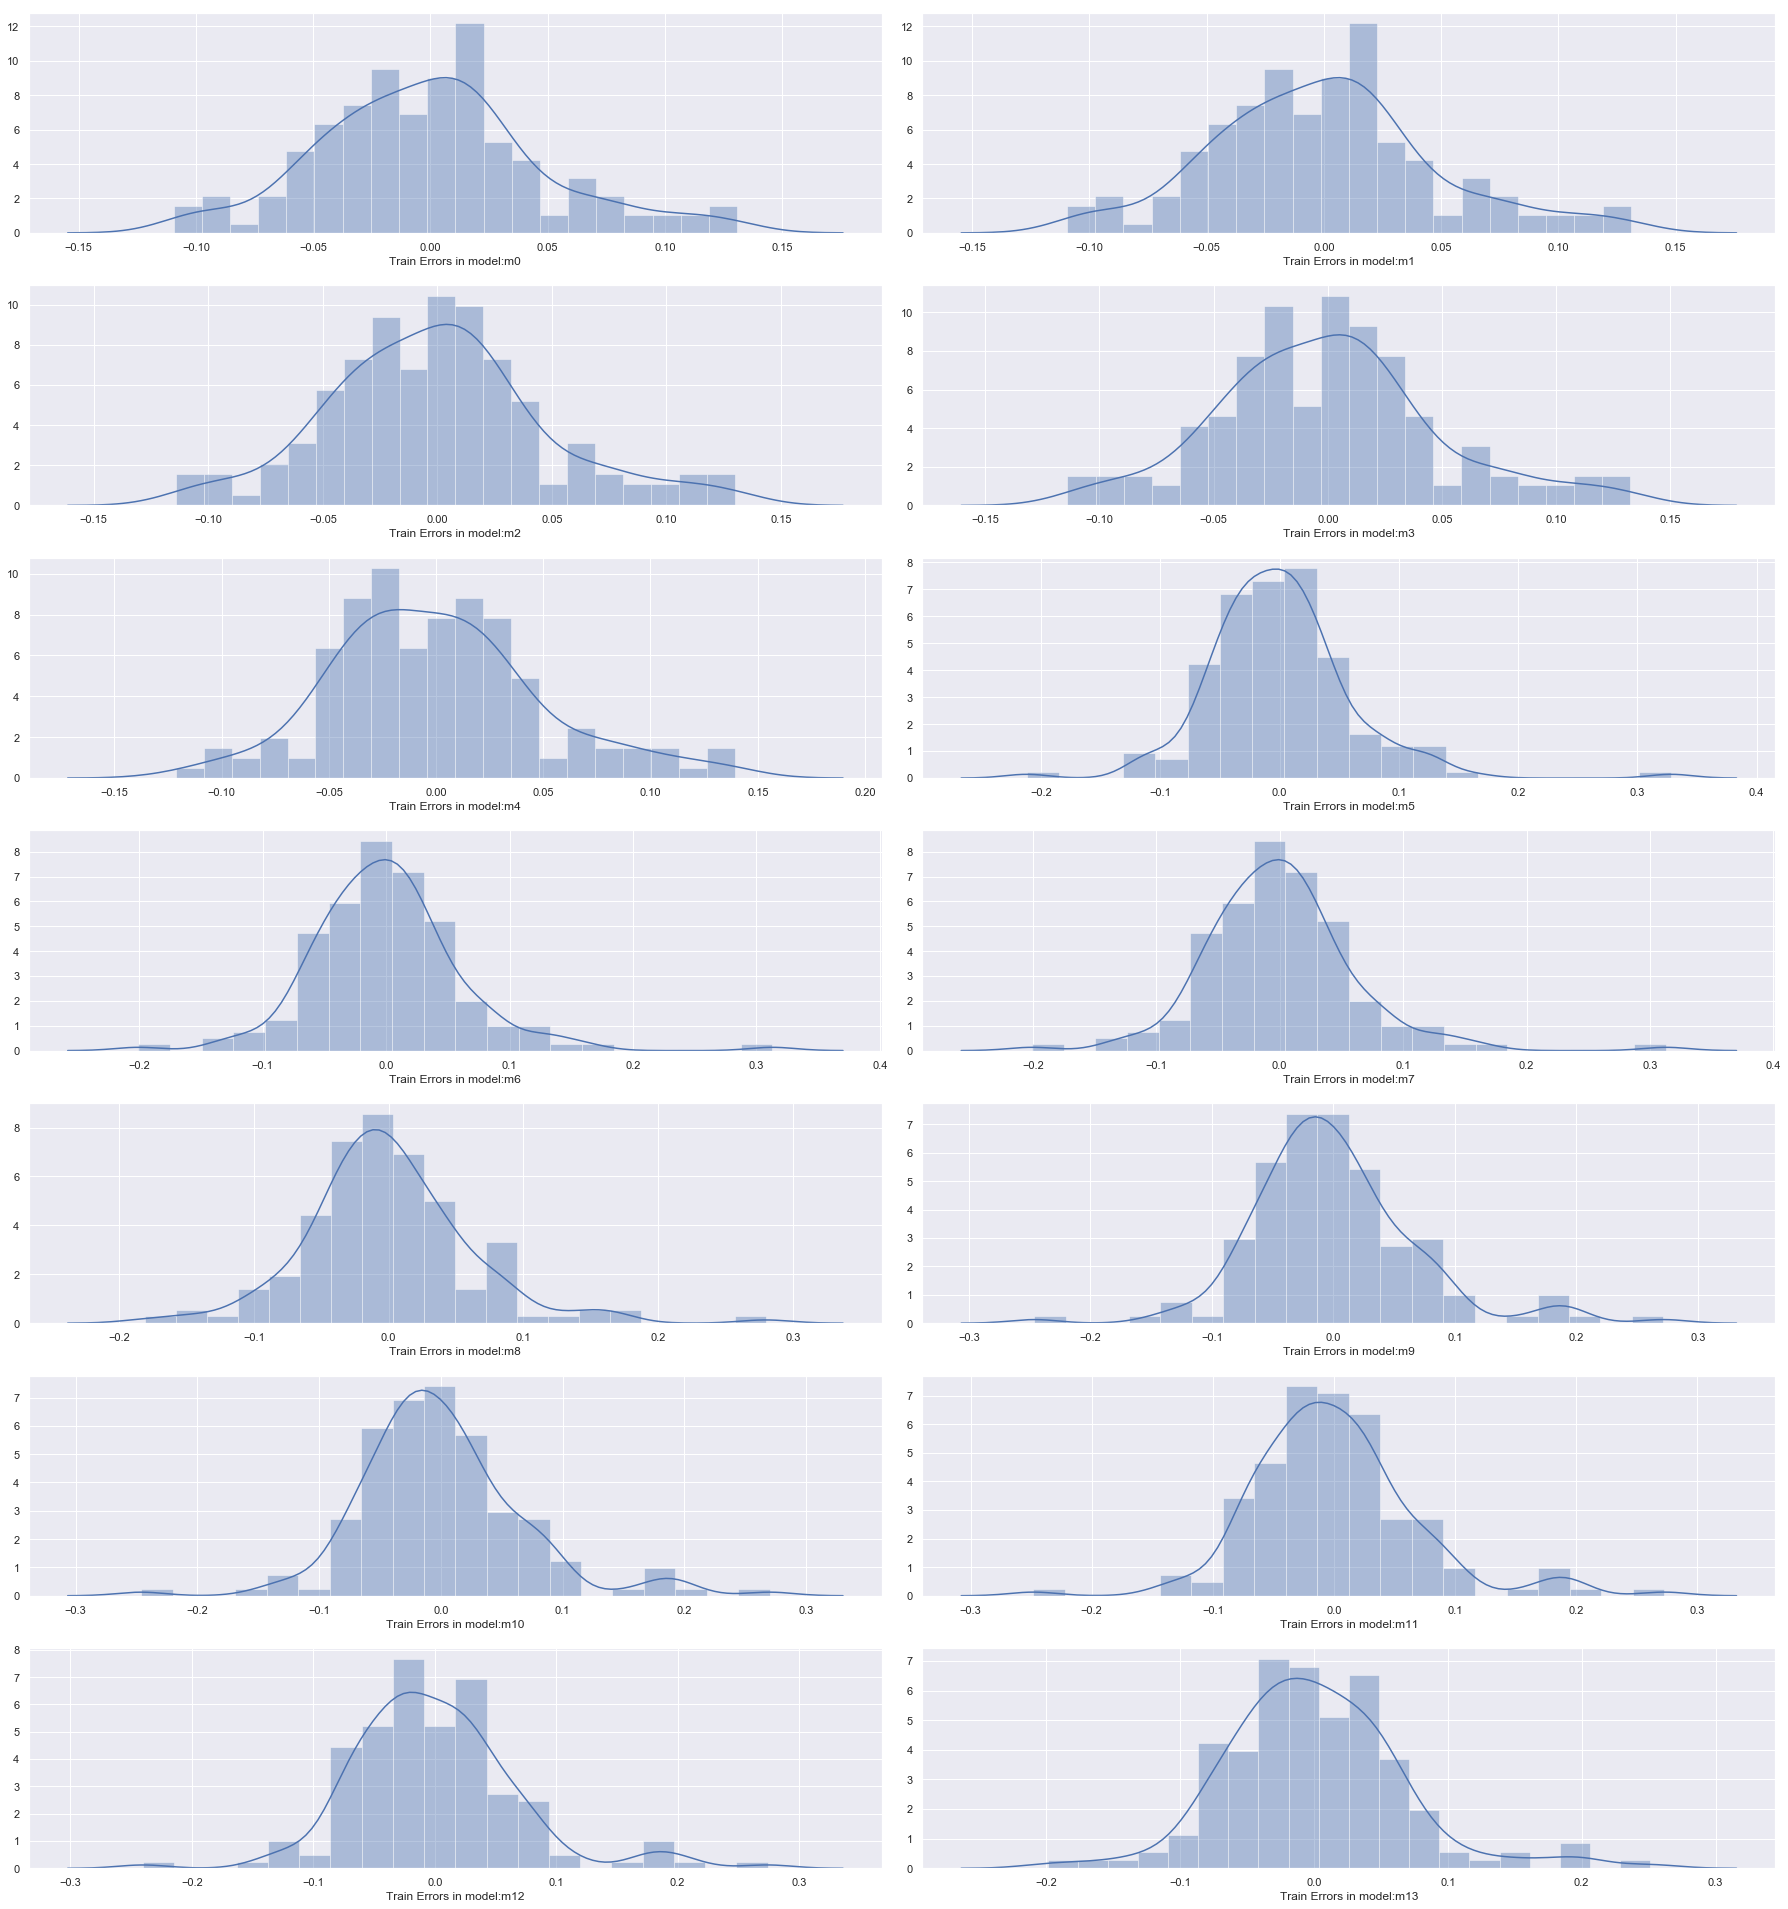

In [76]:
cols = train_res.columns
plt.figure(figsize=(25,30))
for i, col in enumerate(cols):
    
    if len(cols) %2 == 0:
        rows = int(len(num_cols)/2)
    else:
        rows = int(len(num_cols)/2) +1
    
    plt.subplot(rows, 2, i+1)    
    ax = sns.distplot(train_res[col],bins = 20)
    ax.set(xlabel='Train Errors in model:' + col)

    plt.tight_layout()
plt.show()

Finding: 
- Error is uniformly distributed

## Model Evaluation

Text(0, 0.5, 'y_pred')

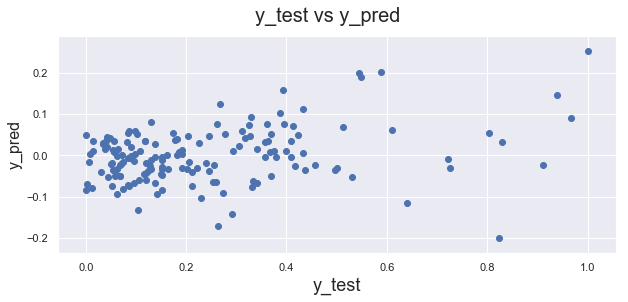

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,(y_train - y_hat_train))
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

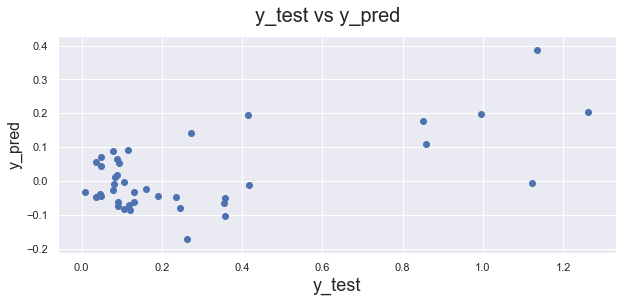

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,(y_test - y_hat_test))
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

There is no such pattern identified from the scatter plt. So we can infer that the data is linear and there is no Heteroskedasticity issue from the model

# Conclusion:
From the HeatMap, we can conclude that:
        - Wheel base , Car Length , Car Width are highly correlated.
        - Highway mpg and city mpg are highly correlated.
        - Compression ratio and fuel type are correlated
        - Engine size, Curb weight and horse power are also correlated


From the Scatter/Pair plots, features which have stronger relationship with price are:
    - 1. Curb-Weight
    - 2. Engine-Size
    - 3. Horsepower
    - 4. Mpg(City / Highway mpg)
    - 5. Lenght/ Width
    - 6. Engine Type
    - 7. Fuel System
    - 8. Number Of Cylinders - 4 or 6

#### Identification of factors for varying car price and help Chinese company to enter US market:
- Enginesize, curb-weight, horsepower - These parameters have positive relationship with car price.
- Mileage per gallon: As the MPG increases the car price decreases. It means, MPG has a -ve relationship with Horsepower, Enginesize, and Curb weight. It mean, more powerful is the engine, it will consume more Diesel/Gas. Hence the mileage decreases with increase in engine size.
- Fuel Type Diesel Cars are manufactured more in comparision with Gas cars.
- Std aspirations type are more in the market when compared against the Turbo aspiration type.
- Forward Wheel Drive(Fwd) cars are manuafactured more over the 4 Wheel Drive and Rear Wheel Drive Cars. Fwd cars are almost are comparatively lower priced than Rwd cars.
- MPFI Fuel System car is manuafactured more and It is bit costlier than other fule systems. 2bbl fuel system is the 2nd highest manuafactured fuel system type and it is reasonably priced. 
- Engineype OHC is manufactured more when compared against other car engine types.


### Final Model Report Explaining the reason for pricing are:
For these the P-value and VIF is less tha 5%
- companyName_plymouth
- companyName_dodge
- companyName_mitsubishi
- companyName_toyota
- wheelbase
- horsepower
- companyName_bmw
- companyName_buick
- companyName_porsche

##### Training Results :
    - F-statistics : 140.05938256007505
    - R-Squared : 0.8955620583731947
    - Adj R-Squared : 0.8891678986817576

- Testing Results :
    - Test Mean_Squared_Error : 0.014222211103648302
    - Test R_square_value : 0.8761129569542494

**Further We Can Include EngineSize and CurbWeight To Explain More Variation explaining the pricing detail**.

- After including EngineSize:

- Training Results :
    - F-statistics : 137.07329010374917
    - R-Squared : 0.9037404674876298
    - Adj R-Squared : 0.897147348822399

- Testing Results :
    - Test Mean_Squared_Error : 0.011584866326137502
    - Test R_square_value : 0.8990863781471152